#### Initial population (full method vs growth method)
#### Fitness + penalization
#### Parent selection (80/20)
#### Crossover
#### Mutation 
 * function node mutation 
 * terminal node mutation 
 * growth mutation 
 * truncation mutation
 * swapping mutation
 * gaussian mutation
 
#### Stop conditions
#### BLOAT Problem 


# Introduction
## Goal. 
The goal of this lab is to study the application of **Genetic Programming (GP)** to various kinds of problems. We will also investigate the parametrization of the algorithm and its effect on the algorithmic performance. This lab continues the use of the deap$^{[1]}$ framework for the Python programming language we have seen in the previous lab. All the exercises are based on examples taken from the deap tutorial on Genetic Programming$^{[2]}$. If you did not participate in the previous lab, you may want to look that over first and then start this lab’s exercises.

--- 

[1]: Distributed Evolutionary Algorithms in Python: https://github.com/DEAP/deap

[2]: GP tutorials: https://deap.readthedocs.io/en/master/tutorials/advanced/gp.html

# Exercise 1
In this exercise we will use GP as a supervised Machine Learning (ML) technique for solving one of the classical problems where GP has shown the most straightforward and successful applications: **symbolic regression.** Symbolic regression is a form of function approximation that consists in fitting some data in the form of input-output samples to determine an expression (a symbolic formula) that approximates those samples. 
Assuming a set $S$ of $N$ samples $(S = {s_1, s_2, . . . , s_N })$, where each sample is composed of an n-dimensional input and a scalar output $y$, in the following form:

<center>$s_1 : [x_1, x_2, . . . , x_n] → y_1$
<center>$s_2 : [x_1, x_2, . . . , x_n] → y_2$
<center>$· · ·$
<center>$s_N : [x_1, x_2, . . . , x_n] → y_N$

the goal is to find an expression $f(·)$ such that $y = f(x_1, x_2, . . . , x_n) \forall s \in S$. Usually, an error metric such as the MSE (Mean Squared Error), $MSE= \frac{1}{N}\sum_{i \in N}[y - f(x_1, x_2, . . ., x_n)]^2$, is used to measure an individual’s fitness in terms of approximation error.

Here, we will consider a 1-dimensional input ($n = 1$), such that the set of samples is composed of couples $(x, y)$. By default, $N = 20$ equidistant samples are generated in the range $[−1, 1]$ by means of the polynomial function: 
    
<center> $y = f^{*}(x) = x^4 + x^3 + x^2 + x$

These samples are then used to evaluate the fitness of the evolving GP trees. The goal is to find an optimal tree describing a formula that approximates $f^{*}(·)$ such that the MSE is minimized$^{[1]}$.
The next cell contains the main code. Take a look at it and spend some time to understand its main steps.

One of the most important aspects is the definition of the *primitive set* (also called  non-terminal or **function set**), which in this case contains the four basic arithmetic operations, the trigonometric functions **`cos`** and **`sin`**, and the **`neg`** operator (such that **`neg(x)=-x`**). Note that the standard division operator is replaced by a custom function named **`protectedDiv`**, which handles divisions by zero without returning errors (this detail is often very important in GP-based symbolic regression, where it's not possible to check a priori all possible inputs to a division node). Note also that in `deap` the configuration of the Evolutionary Algorithm (in this case, Genetic Programming) is obtained by means of a series of function hooks registered in a `creator` object (that handles the initialization of the individual genotypes with their fitness values) and a `toolbox` object (that handles all the other methods that are called during the algorithm execution: evaluation, selection, mutation, crossover, etc.). All function hooks come with a user-defined alias (the first argument of the methods `create`, `register` and `decorate`). The evaluation of the fitness function (in this case, the MSE) is implemented in the method `evalSymbReg`, that calls the method `generatorFunction` (the only part of code you should change if you want to test a different generator function).

![tree.png](img/img_11/tree.png)

The relevant parameters of the Genetic Programming algorithm can be found at the beginning of the script. In particular, consider the parameters `GP_POP_SIZE`, `GP_NGEN`, `GP_CXPB`, `GP_MUTPB`,`GP_TRNMT_SIZE`, and `GP_HOF_SIZE`. These parameters represent, respectively: the **population size (`GP_POP_SIZE`)**,  the **number of generations (`GP_NGEN`)**, the **crossover probability (`GP_CXPB`)**, the **mutation probability (`GP_MUTPB`)**, the **tournament size (`GP_TRNMT_SIZE`)** and the size of the **Hall-of-Fame (`GP_HOF_SIZE`)$^{[2]}$**. See the documentation$^{[3]}$ for further explanations on the implementation details of this exercise.

At the end of the run, the script will show you (and save on files, in the `results` folder) a graphical representation$^{[4]}$ of the best evolved tree (similar to that shown in the figure above), as well as a comparison between the values of the real and GP-approximated data, and the evolutionary trends of the trees' fitness and size (i.e., number of nodes) across generations, see the figure below.

![tree.png](img/img_11/symbreg_merged.png)
    
- **Is the GP algorithm able to approximate the given polynomial, with the standard configuration? What happens when you run the script multiple times? Do you always obtain the same results, or not? Why?**
    
- **Try to change the generator function (e.g. to include trigonometric functions) defined in the method `generatorFunction`. Is the GP algorithm able to approximate more complicated generator functions? Which parameters can you change to improve the results?**

---
    
[1]: Note that while in this synthetic example we know that samples are generated by a certain \emph{generator function} $f^*(\cdot)$, in practical applications we don't know if this function even exists -or has a meaningful physical/mathematical formulation. In other words, the goal of GP is to approximate the mapping between inputs and outputs in a purely data-driven approach.
    
[2]: Note that *deap* uses a structure called Hall-of-Fame to store the best individual(s) found during the evolutionary process. The size of this archive is determined by the parameter `GP_HOF_SIZE`. This structure is only used to report the best solutions at the end of the evolutionary process, and it is not to be confused with the Hall-of-Fame used in competitive co-evolution.
    
[3]: See https://deap.readthedocs.io/en/master/examples/gp_symbreg.html
    
[4]: The Python packages `pygraphviz` and `networkx` are required for this.

In [1]:
# Note: this cell will install the dependencies pygraphviz and networkx
# If you are using Windows, please follow the instructions that you will find here: 
#       https://pygraphviz.github.io/documentation/stable/install.html#windows
# If you are still not able to import pygraphviz due to an error like:
# 'ImportError: DLL load failed while importing _graphviz'
# you may solve this error by adding e.g. "C:\Program Files\Graphviz\bin" to the PATH environment variable.
!python3 -m pip install networkx
#!sudo apt-get install graphviz graphviz-dev
!pip install pygraphviz


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
print(os.getcwd())

C:\Users\Utente\Dropbox\PC\Desktop\UNITN\Bio-inspired AI\Labs\Lab 11 new


### INITIAL TRIAL

EphemeralConstant is already defined, if you changed it restart the kernel
0
{0: 'add', 1: 'mul', 2: 'add', 3: 'add', 4: 'mul', 5: 'mul', 6: 'x', 7: 'x', 8: 'x', 9: 'mul', 10: 'x', 11: 'x', 12: 'x', 13: 'x', 14: 'x'}
add
1
{0: 'add', 1: 'mul', 2: 'add', 3: 'add', 4: 'mul', 5: 'mul', 6: 'x', 7: 'x', 8: 'x', 9: 'mul', 10: 'x', 11: 'x', 12: 'x', 13: 'x', 14: 'x'}
mul
2
{0: 'add', 1: 'mul', 2: 'add', 3: 'add', 4: 'mul', 5: 'mul', 6: 'x', 7: 'x', 8: 'x', 9: 'mul', 10: 'x', 11: 'x', 12: 'x', 13: 'x', 14: 'x'}
add
3
{0: 'add', 1: 'mul', 2: 'add', 3: 'add', 4: 'mul', 5: 'mul', 6: 'x', 7: 'x', 8: 'x', 9: 'mul', 10: 'x', 11: 'x', 12: 'x', 13: 'x', 14: 'x'}
add
4
{0: 'add', 1: 'mul', 2: 'add', 3: 'add', 4: 'mul', 5: 'mul', 6: 'x', 7: 'x', 8: 'x', 9: 'mul', 10: 'x', 11: 'x', 12: 'x', 13: 'x', 14: 'x'}
mul
5
{0: 'add', 1: 'mul', 2: 'add', 3: 'add', 4: 'mul', 5: 'mul', 6: 'x', 7: 'x', 8: 'x', 9: 'mul', 10: 'x', 11: 'x', 12: 'x', 13: 'x', 14: 'x'}
mul
6
{0: 'add', 1: 'mul', 2: 'add', 3: 'add', 4: 'mu

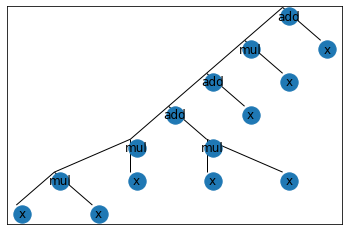

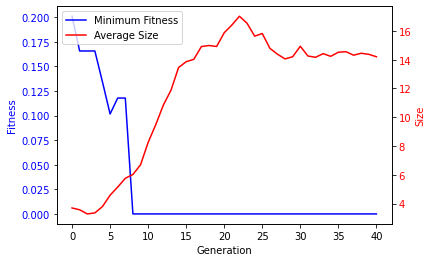

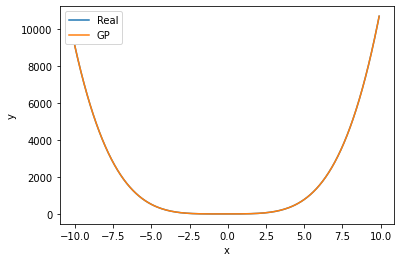

In [8]:
import sys
import time
import operator
import math
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import os

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 300               # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.9, 0.05   # crossover and mutation probability for GP  #TYPICAL VALUES
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP
seed = 0

"""
-------------------------------------------------------------------------
"""
folder = 'results'

# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)

try:
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.renameArguments(ARG0='x')

try:
    del creator.FitnessMinSR
    del creator.IndividualSR
except:
    pass
creator.create("FitnessMinSR", base.Fitness, weights=(-1.0,))
creator.create("IndividualSR", gp.PrimitiveTree, fitness=creator.FitnessMinSR)
    
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.IndividualSR, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# TODO: try to change the expression e.g. to include trigonometric functions
def generatorFunction(x):
    #return math.sin(x)+math.cos(x)
    #return math.sin(x)*x**2
    #return math.sin(x)+5*x**2
    return x**4 + x**3 + x**2 + x

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    gpFunction = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression and the real function
    sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#--------------------------------------------------------------------

random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats=mstats, halloffame=hof, verbose = False)

#--------------------------------------------------------------------

# plot GP tree
import utils.utils_11.plot_utils as plot_utils
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'symbreg_'+str(seed),'results')

#--------------------------------------------------------------------

# plot fitness vs size trends
import matplotlib.pyplot as plt
plt.style.use("ggplot")

gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["size"].select("avg")

fig = plt.figure("GP (fitness and tree size trend)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

if folder is not None and not os.path.exists(folder):
    os.makedirs(folder)
plt.savefig(folder+'/'+'trends_symbreg.png')

# plot real vs approximated values
x_ = points=[x/10. for x in range(-100,100)]
y_real = [generatorFunction(x) for x in x_]
gpFunction = toolbox.compile(expr=hof[0])
y_gp = [gpFunction(x) for x in x_]
fig = plt.figure("GP (real vs approximated values)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x_, y_real, label="Real")
line2 = ax1.plot(x_, y_gp, label="GP")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

#### The GP perfectly reproduce the polynomial function

### Function $x^{4} + x^{3} + x^{2} + x$ with only `add`

EphemeralConstant is already defined, if you changed it restart the kernel
0
{0: 'x'}
x
Best individual GP is x, (0.564582833,)


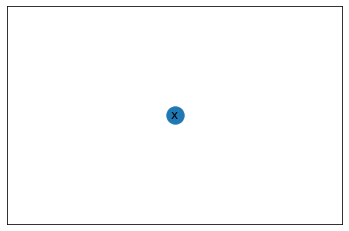

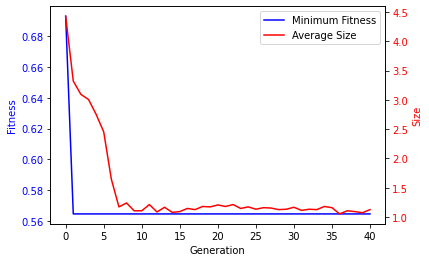

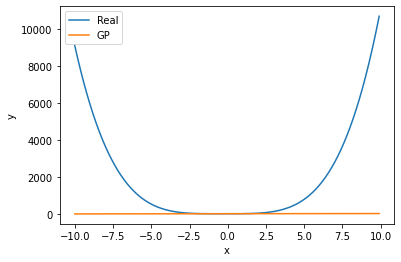

In [7]:
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 300               # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.9, 0.05   # crossover and mutation probability for GP  #TYPICAL VALUES
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP
seed = 0

"""
-------------------------------------------------------------------------
"""
folder = 'results'

# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

pset.addPrimitive(operator.add, 2)
#pset.addPrimitive(operator.sub, 2)
#pset.addPrimitive(operator.mul, 2)
#pset.addPrimitive(protectedDiv, 2)
#pset.addPrimitive(operator.neg, 1)
#pset.addPrimitive(math.cos, 1)
#pset.addPrimitive(math.sin, 1)

try:
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.renameArguments(ARG0='x')

try:
    del creator.FitnessMinSR
    del creator.IndividualSR
except:
    pass
creator.create("FitnessMinSR", base.Fitness, weights=(-1.0,))
creator.create("IndividualSR", gp.PrimitiveTree, fitness=creator.FitnessMinSR)
    
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.IndividualSR, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# TODO: try to change the expression e.g. to include trigonometric functions
def generatorFunction(x):
    #return math.sin(x)+math.cos(x)
    #return math.sin(x)*x**2
    #return math.sin(x)+5*x**2
    return x**4 + x**3 + x**2 + x

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    gpFunction = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression and the real function
    sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#--------------------------------------------------------------------
seed = 238842
random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats=mstats, halloffame=hof, verbose=False)

#--------------------------------------------------------------------

# plot GP tree
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'symbreg_'+str(seed),'results')

#--------------------------------------------------------------------

# plot fitness vs size trends
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["size"].select("avg")

fig = plt.figure("GP (fitness and tree size trend)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

if folder is not None and not os.path.exists(folder):
    os.makedirs(folder)
plt.savefig(folder+'/'+'trends_symbreg.png')

# plot real vs approximated values
x_ = points=[x/10. for x in range(-100,100)]
y_real = [generatorFunction(x) for x in x_]
gpFunction = toolbox.compile(expr=hof[0])
y_gp = [gpFunction(x) for x in x_]
fig = plt.figure("GP (real vs approximated values)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x_, y_real, label="Real")
line2 = ax1.plot(x_, y_gp, label="GP")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

#### The GP, using only sum operation is not able to approximate the polynomial function

### Function $x^{4} + x^{3} + x^{2} + x$ with only `add` and `mul`  

EphemeralConstant is already defined, if you changed it restart the kernel
0
{0: 'add', 1: 'add', 2: 'x', 3: 'mul', 4: 'mul', 5: 'add', 6: 'x', 7: 'mul', 8: 'x', 9: 'x', 10: 'x', 11: 'x', 12: 'mul', 13: 'x', 14: 'x'}
add
1
{0: 'add', 1: 'add', 2: 'x', 3: 'mul', 4: 'mul', 5: 'add', 6: 'x', 7: 'mul', 8: 'x', 9: 'x', 10: 'x', 11: 'x', 12: 'mul', 13: 'x', 14: 'x'}
add
2
{0: 'add', 1: 'add', 2: 'x', 3: 'mul', 4: 'mul', 5: 'add', 6: 'x', 7: 'mul', 8: 'x', 9: 'x', 10: 'x', 11: 'x', 12: 'mul', 13: 'x', 14: 'x'}
x
3
{0: 'add', 1: 'add', 2: 'x', 3: 'mul', 4: 'mul', 5: 'add', 6: 'x', 7: 'mul', 8: 'x', 9: 'x', 10: 'x', 11: 'x', 12: 'mul', 13: 'x', 14: 'x'}
mul
4
{0: 'add', 1: 'add', 2: 'x', 3: 'mul', 4: 'mul', 5: 'add', 6: 'x', 7: 'mul', 8: 'x', 9: 'x', 10: 'x', 11: 'x', 12: 'mul', 13: 'x', 14: 'x'}
mul
5
{0: 'add', 1: 'add', 2: 'x', 3: 'mul', 4: 'mul', 5: 'add', 6: 'x', 7: 'mul', 8: 'x', 9: 'x', 10: 'x', 11: 'x', 12: 'mul', 13: 'x', 14: 'x'}
add
6
{0: 'add', 1: 'add', 2: 'x', 3: 'mul', 4: 'mul', 

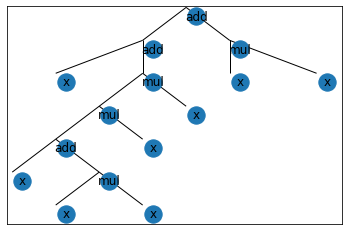

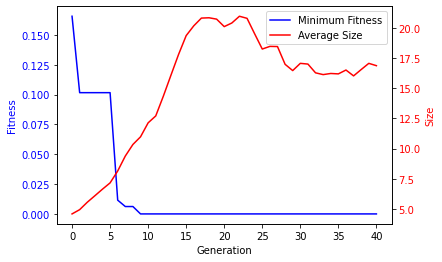

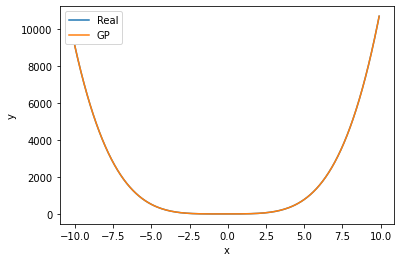

In [10]:
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 300               # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.9, 0.05   # crossover and mutation probability for GP  #TYPICAL VALUES
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP
seed = 0

"""
-------------------------------------------------------------------------
"""
folder = 'results'

# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

pset.addPrimitive(operator.add, 2)
#pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
#pset.addPrimitive(protectedDiv, 2)
#pset.addPrimitive(operator.neg, 1)
#pset.addPrimitive(math.cos, 1)
#pset.addPrimitive(math.sin, 1)

try:
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.renameArguments(ARG0='x')

try:
    del creator.FitnessMinSR
    del creator.IndividualSR
except:
    pass
creator.create("FitnessMinSR", base.Fitness, weights=(-1.0,))
creator.create("IndividualSR", gp.PrimitiveTree, fitness=creator.FitnessMinSR)
    
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.IndividualSR, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# TODO: try to change the expression e.g. to include trigonometric functions
def generatorFunction(x):
    #return math.sin(x)+math.cos(x)
    #return math.sin(x)*x**2
    #return math.sin(x)+5*x**2
    return x**4 + x**3 + x**2 + x

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    gpFunction = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression and the real function
    sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#--------------------------------------------------------------------
seed = 238842
random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats=mstats, halloffame=hof, verbose=False)

#--------------------------------------------------------------------

# plot GP tree
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'symbreg_'+str(seed),'results')

#--------------------------------------------------------------------

# plot fitness vs size trends
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["size"].select("avg")

fig = plt.figure("GP (fitness and tree size trend)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

if folder is not None and not os.path.exists(folder):
    os.makedirs(folder)
plt.savefig(folder+'/'+'trends_symbreg.png')

# plot real vs approximated values
x_ = points=[x/10. for x in range(-100,100)]
y_real = [generatorFunction(x) for x in x_]
gpFunction = toolbox.compile(expr=hof[0])
y_gp = [gpFunction(x) for x in x_]
fig = plt.figure("GP (real vs approximated values)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x_, y_real, label="Real")
line2 = ax1.plot(x_, y_gp, label="GP")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

#### It's possible to notice that sum and mul are enough for reproducing the behaviour of the function

In [26]:
best_fitnesses = []

for _ in range (50):
    pop = toolbox.population(n=GP_POP_SIZE)
    hof = tools.HallOfFame(GP_HOF_SIZE)

    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", numpy.mean)
    mstats.register("std", numpy.std)
    mstats.register("min", numpy.min)
    mstats.register("max", numpy.max)

    final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                          stats=mstats, halloffame=hof, verbose=False)
    
    best_fitnesses.append(hof[0].fitness.values)

best_fitnesses = [t[0] for t in best_fitnesses]

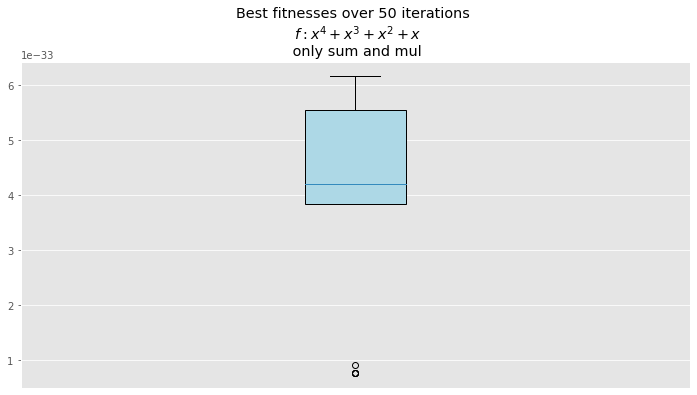

In [41]:
plt.figure(figsize =(12,6))
plt.boxplot(best_fitnesses, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Best fitnesses over 50 iterations \n $ f: x^{4} + x^{3} + x^{2} + x$ \n only sum and mul")
plt.xticks([])
plt.show()

### Function $\sin(x)+ \cos(x)$ using only `add` and `mul`

EphemeralConstant is already defined, if you changed it restart the kernel
0
{0: 'add', 1: 'x', 2: 'mul', 3: 'x', 4: 'x'}
add
1
{0: 'add', 1: 'x', 2: 'mul', 3: 'x', 4: 'x'}
x
2
{0: 'add', 1: 'x', 2: 'mul', 3: 'x', 4: 'x'}
mul
3
{0: 'add', 1: 'x', 2: 'mul', 3: 'x', 4: 'x'}
x
4
{0: 'add', 1: 'x', 2: 'mul', 3: 'x', 4: 'x'}
x
Best individual GP is add(x, mul(x, x)), (0.44773341220781315,)


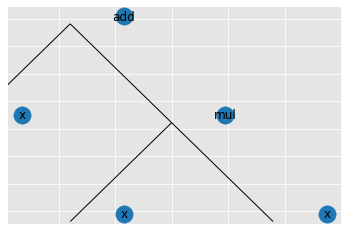

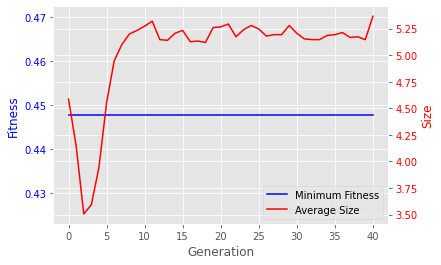

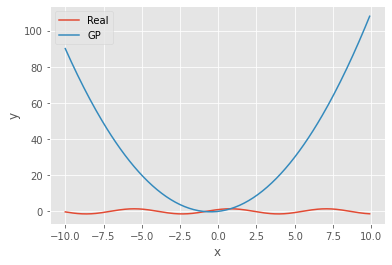

In [38]:
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 300               # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.9, 0.05   # crossover and mutation probability for GP  #TYPICAL VALUES
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP
seed = 0

"""
-------------------------------------------------------------------------
"""
folder = 'results'

# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

pset.addPrimitive(operator.add, 2)
#pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
#pset.addPrimitive(protectedDiv, 2)
#pset.addPrimitive(operator.neg, 1)
#pset.addPrimitive(math.cos, 1)
#pset.addPrimitive(math.sin, 1)

try:
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.renameArguments(ARG0='x')

try:
    del creator.FitnessMinSR
    del creator.IndividualSR
except:
    pass
creator.create("FitnessMinSR", base.Fitness, weights=(-1.0,))
creator.create("IndividualSR", gp.PrimitiveTree, fitness=creator.FitnessMinSR)
    
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.IndividualSR, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# TODO: try to change the expression e.g. to include trigonometric functions
def generatorFunction(x):
    return math.sin(x)+math.cos(x)
    #return math.sin(x)*x**2
    #return math.sin(x)+5*x**2
    #return x**4 + x**3 + x**2 + x

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    gpFunction = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression and the real function
    sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#--------------------------------------------------------------------
seed = 238842
random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats=mstats, halloffame=hof, verbose=False)

#--------------------------------------------------------------------

# plot GP tree
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'symbreg_'+str(seed),'results')

#--------------------------------------------------------------------

# plot fitness vs size trends
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["size"].select("avg")

fig = plt.figure("GP (fitness and tree size trend)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

if folder is not None and not os.path.exists(folder):
    os.makedirs(folder)
plt.savefig(folder+'/'+'trends_symbreg.png')

# plot real vs approximated values
x_ = points=[x/10. for x in range(-100,100)]
y_real = [generatorFunction(x) for x in x_]
gpFunction = toolbox.compile(expr=hof[0])
y_gp = [gpFunction(x) for x in x_]
fig = plt.figure("GP (real vs approximated values)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x_, y_real, label="Real")
line2 = ax1.plot(x_, y_gp, label="GP")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

### Function $\sin(x)+ \cos(x)$ using `add`,`mul`, `sin(x)` and `cos(x)`

EphemeralConstant is already defined, if you changed it restart the kernel
0
{0: 'add', 1: 'sin', 2: 'x', 3: 'cos', 4: 'x'}
add
1
{0: 'add', 1: 'sin', 2: 'x', 3: 'cos', 4: 'x'}
sin
2
{0: 'add', 1: 'sin', 2: 'x', 3: 'cos', 4: 'x'}
x
3
{0: 'add', 1: 'sin', 2: 'x', 3: 'cos', 4: 'x'}
cos
4
{0: 'add', 1: 'sin', 2: 'x', 3: 'cos', 4: 'x'}
x
Best individual GP is add(sin(x), cos(x)), (0.0,)


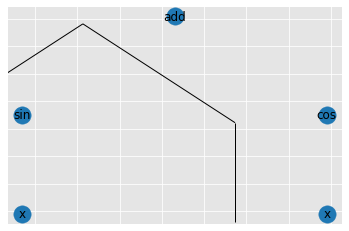

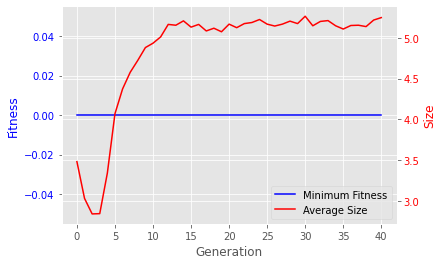

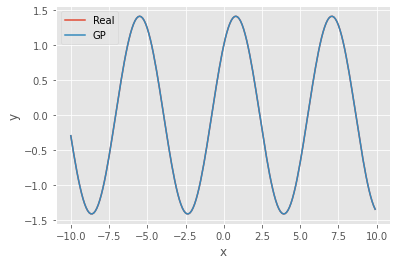

In [39]:
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 300               # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.9, 0.05   # crossover and mutation probability for GP  #TYPICAL VALUES
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP
seed = 0

"""
-------------------------------------------------------------------------
"""
folder = 'results'

# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

pset.addPrimitive(operator.add, 2)
#pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
#pset.addPrimitive(protectedDiv, 2)
#pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)

try:
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.renameArguments(ARG0='x')

try:
    del creator.FitnessMinSR
    del creator.IndividualSR
except:
    pass
creator.create("FitnessMinSR", base.Fitness, weights=(-1.0,))
creator.create("IndividualSR", gp.PrimitiveTree, fitness=creator.FitnessMinSR)
    
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.IndividualSR, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# TODO: try to change the expression e.g. to include trigonometric functions
def generatorFunction(x):
    return math.sin(x)+math.cos(x)
    #return math.sin(x)*x**2
    #return math.sin(x)+5*x**2
    #return x**4 + x**3 + x**2 + x

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    gpFunction = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression and the real function
    sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#--------------------------------------------------------------------
seed = 238842
random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats=mstats, halloffame=hof, verbose=False)

#--------------------------------------------------------------------

# plot GP tree
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'symbreg_'+str(seed),'results')

#--------------------------------------------------------------------

# plot fitness vs size trends
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["size"].select("avg")

fig = plt.figure("GP (fitness and tree size trend)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

if folder is not None and not os.path.exists(folder):
    os.makedirs(folder)
plt.savefig(folder+'/'+'trends_symbreg.png')

# plot real vs approximated values
x_ = points=[x/10. for x in range(-100,100)]
y_real = [generatorFunction(x) for x in x_]
gpFunction = toolbox.compile(expr=hof[0])
y_gp = [gpFunction(x) for x in x_]
fig = plt.figure("GP (real vs approximated values)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x_, y_real, label="Real")
line2 = ax1.plot(x_, y_gp, label="GP")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

In [45]:
best_fitnesses = []

for _ in range (50):
    pop = toolbox.population(n=GP_POP_SIZE)
    hof = tools.HallOfFame(GP_HOF_SIZE)

    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", numpy.mean)
    mstats.register("std", numpy.std)
    mstats.register("min", numpy.min)
    mstats.register("max", numpy.max)

    final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                          stats=mstats, halloffame=hof, verbose=False)
    
    best_fitnesses.append(hof[0].fitness.values)

best_fitnesses = [t[0] for t in best_fitnesses]

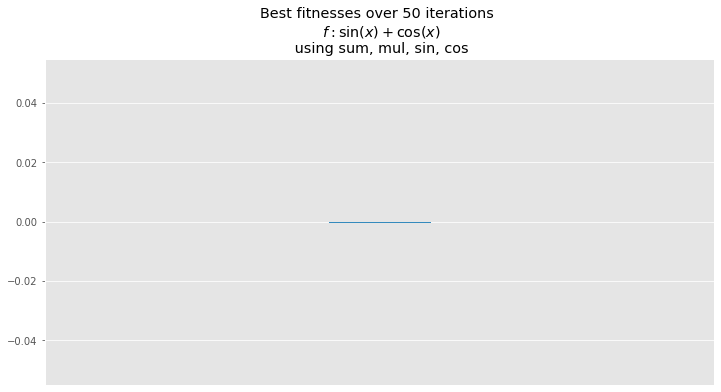

In [46]:
plt.figure(figsize =(12,6))
plt.boxplot(best_fitnesses, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title("Best fitnesses over 50 iterations \n $f: \sin(x) + \cos(x)$ \n using sum, mul, sin, cos")
plt.xticks([])
plt.show()

###  function: $\cos(\exp(x)*10)$

EphemeralConstant is already defined, if you changed it restart the kernel
0
{0: 'mul', 1: 'mul', 2: 'sin', 3: 'sin', 4: 'sin', 5: 'cos', 6: 'mul', 7: 'x', 8: 'cos', 9: 'sin', 10: 'cos', 11: 'cos', 12: 'cos', 13: 'cos', 14: 'sin', 15: 'sin', 16: 'cos', 17: 'x', 18: 'sub', 19: 'protectedDiv', 20: 'x', 21: 'sin', 22: 'sin', 23: 'x', 24: 'x', 25: 'mul', 26: 'cos', 27: 'protectedDiv', 28: 'cos', 29: 'x', 30: 'cos', 31: 'protectedDiv', 32: 'sin', 33: 'sin', 34: 'cos', 35: 'sin', 36: 'mul', 37: 'x', 38: 'x', 39: 'cos', 40: 'protectedDiv', 41: 'sin', 42: 'sin', 43: 'x', 44: 'x', 45: 'sin', 46: 'sin', 47: 'x'}
mul
1
{0: 'mul', 1: 'mul', 2: 'sin', 3: 'sin', 4: 'sin', 5: 'cos', 6: 'mul', 7: 'x', 8: 'cos', 9: 'sin', 10: 'cos', 11: 'cos', 12: 'cos', 13: 'cos', 14: 'sin', 15: 'sin', 16: 'cos', 17: 'x', 18: 'sub', 19: 'protectedDiv', 20: 'x', 21: 'sin', 22: 'sin', 23: 'x', 24: 'x', 25: 'mul', 26: 'cos', 27: 'protectedDiv', 28: 'cos', 29: 'x', 30: 'cos', 31: 'protectedDiv', 32: 'sin', 33: 'sin', 34: 

Best individual GP is mul(mul(sin(sin(sin(cos(mul(x, cos(sin(cos(cos(cos(cos(sin(sin(cos(x)))))))))))))), sub(protectedDiv(x, sin(sin(x))), x)), mul(cos(protectedDiv(cos(x), cos(protectedDiv(sin(sin(cos(sin(mul(x, x))))), cos(protectedDiv(sin(sin(x)), x)))))), sin(sin(x)))), (0.29227202077089787,)


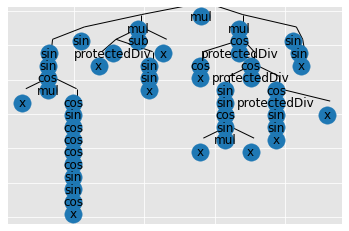

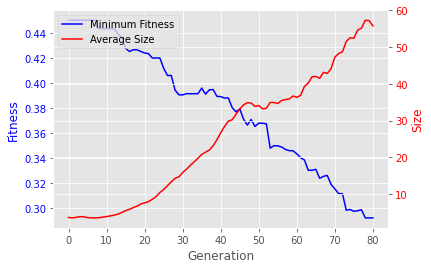

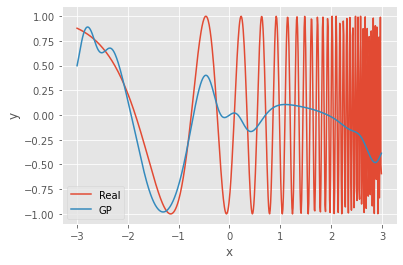

In [75]:
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 500               # population size for GP
GP_NGEN = 80                   # number of generations for GP
GP_CXPB, GP_MUTPB = 0.9, 0.05   # crossover and mutation probability for GP  #TYPICAL VALUES
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 3                 # size of the Hall-of-Fame for GP
seed = 238

"""
-------------------------------------------------------------------------
"""
folder = 'results'

# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(math.exp, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)

try:
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.renameArguments(ARG0='x')

try:
    del creator.FitnessMinSR
    del creator.IndividualSR
except:
    pass
creator.create("FitnessMinSR", base.Fitness, weights=(-1.0,))
creator.create("IndividualSR", gp.PrimitiveTree, fitness=creator.FitnessMinSR)
    
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.IndividualSR, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# TODO: try to change the expression e.g. to include trigonometric functions
def generatorFunction(x):
    return math.cos(math.exp(x)*10)

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    gpFunction = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression and the real function
    sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-30,30)])
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#--------------------------------------------------------------------
seed = 238842
random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats=mstats, halloffame=hof, verbose=False)

#--------------------------------------------------------------------

# plot GP tree
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'symbreg_'+str(seed),'results')

#--------------------------------------------------------------------

# plot fitness vs size trends
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["size"].select("avg")

fig = plt.figure("GP (fitness and tree size trend)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

if folder is not None and not os.path.exists(folder):
    os.makedirs(folder)
plt.savefig(folder+'/'+'trends_symbreg.png')

# plot real vs approximated values
x_ = points=[x/100. for x in range(-300,300)]
y_real = [generatorFunction(x) for x in x_]
gpFunction = toolbox.compile(expr=hof[0])
y_gp = [gpFunction(x) for x in x_]
fig = plt.figure("GP (real vs approximated values)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x_, y_real, label="Real")
line2 = ax1.plot(x_, y_gp, label="GP")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

# Exercise 2

In this exercise we will use GP for solving different kinds of problems. In the next cells you will find various other examples of GP applications. 
Through these examples, we will see how GP can be flexibly applied to solve a broad range of problems beyond function approximation, such as classification and evolution of computer programs, with different features and levels of complexity. In particular, consider the following four cells:


 1. exercise parity: **the even parity problem$^{[1]}$.** This is a classical benchmark problem used in the GP literature: the goal is to _evolve a Boolean expression_ that produces the correct value of the even parity bit, given as input an array of $n$ bits. For instance, for an input size $n=6$ (Parity-6 problem), the goal is to match the parity bit value for each of the $2^6 = 64$ possible combinations of 6 bits$^{[2]}$. Thus the fitness of an individual (i.e., a candidate Boolean expression) can be calculated simply as the number of successful cases (to be maximized), such that the maximum attainable fitness is 64 in the case of 6 bits inputs. Note that since in this case all inputs/outputs are bits (Boolean values), the primitive set contains only Boolean operators (`and`, `or`, `xor`, `not`).
	
 2. exercise multiplexer: **the multiplexer problem$^{[3]}$** is another classical benchmark problem used in the GP literature. Similarly to the even parity problem, this problem deals with Boolean values: the goal is _evolve a Boolean expression_ that is capable to reproduce the behavior of an electronic multiplexer (mux)$^{[4]}$. In the default configuration, a 3-8 multiplexer is used (3 select entries, labeled from A0 to A2, and 8 data entries, from D0 to D7), for a total number of $2^3\times2^8=2048$ possible combinations. Thus the fitness is the number of correct outputs over all $2048$ cases, and its maximum value is $2048$.
	
 **3.** exercise spambase: **the ''spam base'' problem$^{[5]}$** consists in \emph{evolving a classifier} that is able to distinguish as spam/non-spam a given database of emails	(saved in `utils/utils_11/data/spambase.csv`). The database consists of $4601$ _labeled_ samples (as such, GP is used here as a supervised ML algorithm), each corresponding to a different email and comprising $57$ mixed integer/real-valued features describing various lexicographic/syntactic characteristics of the email$^{[6]}$, in addition to a binary label indicating if the email is spam (1) or not (0). The evolved classifier must then return a Boolean value which must be `True` if the email is spam, `False` otherwise. To avoid overfitting, each tree generated during the GP run is evaluated on a set of $400$ samples randomly selected from the database (so that **the maximum achievable fitness, i.e. number of correct classifications, is $400$).** Note that since data of different kinds must be manipulated by the classifier (float and Boolean values), in this case the GP algorithm is configured to handle `strongly typed` operations, i.e. for each function in the primitive set the type of inputs and outputs is specified (e.g. to avoid calling a Boolean function with float	values as inputs).
	
**4.** exercise ant: **the ''artificial ant'' problem$^{[7]}$** consists in _evolving a program_ that can successfully control an artificial ant so that it can find and ''eat'' all the food located in a certain environment (i.e., placed along a twisting trail on a square toroidal grid). The program can use three operations, **`move_forward`**, **`turn_right`** and **`turn_left`**, to move the ant forward one cell, turn right or turn left. Each of these operations takes one timestep. The sensing function **`if_food_ahead`**  looks into the cell the ant is currently facing and then executes one of its two arguments, depending upon whether that cell contains food or is empty. Two additional custom operations, **`prog2`** and	**`prog3`** are provided to facilitate the evolution of more complex behaviors. These custom operations take two and three other operations as arguments, respectively, and execute them in sequence. The evaluation function uses an instance of a simple simulator to evaluate a given individual (i.e., a candidate program). Each individual is given $600$ timesteps to navigate a virtual map obtained from an external file (see the file `utils/utils_11/data/santafe_trail.txt`, where `#`, `.` and `S` indicate, respectively, a cell with food, an empty cell, and the starting cell). **The fitness of each individual corresponds to the number of pieces of food picked up.** In this example, the trail contains $89$ pieces of food in total. **Therefore, an optimal individual would achieve a fitness of $89$.**

Since these scripts have all the same structure as the one used in the first exercise (besides obviously the details of the specific problem, especially the evaluator function, and the definition of the primitive set), we won't go into the details of each of them. You can spend some time having a look at the code and trying to get the main steps of each of the four examples.

![mux_trend.png](img/img_11/es2_merged.png)

<center>Example fitness trends for the 3-8 multiplexer problem (left) and the ''artificial ant'' problem (right).


Try to run some experiments with one or more of these four scripts. As in the previous exercise, at the end of the run each script will show you (and save on files, in the `results` folder) a graphical representation of the best evolved tree, as well as the evolutionary trends of the trees' fitness across generations, see figures above.

 1. In the case of the multiplexer problem there is an additional parameter (`MUX_SELECT_LINES`) that allows you to scale the problem, increasing or decreasing its dimensionality. Similarly, for the parity problem there is a parameter (`PARITY_FANIN_M`) that allows you to change the problem dimensionality. This in turn will make the problem easier, or harder. If you tested one of these two problems, consider changing these parameters and observe the GP's behavior. Note, however, that these problems (especially the multiplexer) become computationally very complex when the dimensionality increases, so that experiments can be quite time-consuming!
    
 2. **What kind of performance do you get, in general, on the tested problems? What happens when you change the parametrization of GP?**


---
[1]: Parity problem: https://deap.readthedocs.io/en/master/examples/gp_parity.html
    
[2]: Parity wikipedia: https://en.wikipedia.org/wiki/Parity_bit
    
[3]: Multiplexer problem: https://deap.readthedocs.io/en/master/examples/gp_multiplexer.html
    
[4]: See https://en.wikipedia.org/wiki/Multiplexer for more details
    
[5]: Spam base problem: https://deap.readthedocs.io/en/master/examples/gp_spambase.html
    
[6]: See http://archive.ics.uci.edu/ml/datasets/Spambase for a complete description of the features
    
[7]: Ant problem: https://deap.readthedocs.io/en/master/examples/gp_ant.html

# Spam Base problem

In [84]:
import pandas as pd
df = pd.read_csv("utils/utils_11/data/spambase.csv")
print("shape: ",df.shape)  #57 features + 1 label
df.head(5)

shape:  (4600, 58)


0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...  0.40  \
0  0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
1  0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
2  0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
3  0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.00   

    0.41  0.42  0.778   0.43   0.44  3.756   61   278  1  
0  0.132   0.0  0.372  0.180  0.048  5.114  101  1028  1  
1  0.143   0.0  0.276  0.184  0.010  9.821  485  2259  1  
2  0.137   0.0  0.137  0.000  0.000  3.537   40   191  1  
3  0.135   0.0  0.135  0.000  0.000  3.537   40   191  1  
4  0.223   0.0  0.000  0.000  0.000  3.000   15    54  1  

[5 rows x 58 columns]

EphemeralConstant is already defined, if you changed it restart the kernel
gen	nevals	avg   	std   	min	max
0  	100   	204.69	46.954	109	293
1  	96    	233.42	36.677	145	299
2  	93    	233.71	52.4756	118	332
3  	92    	266.68	35.1519	153	332
4  	97    	266.45	43.1642	101	328
5  	100   	271.13	37.2461	132	326
6  	88    	277.63	37.1006	150	326
7  	90    	278.4 	40.8512	89 	334
8  	88    	283.97	36.9555	159	330
9  	92    	279.89	45.1211	71 	334
10 	94    	280.1 	38.3423	188	333
11 	79    	286.91	38.4536	147	333
12 	84    	298.6 	34.4462	194	341
13 	90    	300.14	38.4112	139	341
14 	88    	295.6 	36.0544	176	341
15 	88    	297.25	35.066 	207	337
16 	92    	300.22	34.5316	200	336
17 	91    	305.09	34.3933	170	345
18 	95    	309.86	25.7379	210	338
19 	98    	310.14	26.2137	210	338
20 	90    	308.93	36.1096	124	342
21 	88    	313.51	25.8961	208	344
22 	83    	313.87	31.0927	195	347
23 	90    	312.35	30.6295	214	347
24 	94    	317.41	23.6686	216	347
25 	95    	320.24	25.7624	158	345
26 	88    

12
{0: 'lt', 1: 'if_then_else', 2: 'lt', 3: 'if_then_else', 4: 'lt', 5: 'if_then_else', 6: 'lt', 7: 'IN51', 8: 'IN47', 9: 'IN51', 10: 'IN45', 11: 'IN27', 12: 'if_then_else', 13: 'lt', 14: 'IN41', 15: 'if_then_else', 16: 'lt', 17: 'IN14', 18: 'if_then_else', 19: 'eq', 20: 'IN24', 21: 'IN0', 22: 'add', 23: 'IN40', 24: 'IN27', 25: 'protectedDiv', 26: 'IN35', 27: 'IN51', 28: 'IN51', 29: 'IN27', 30: 'IN51', 31: 'IN45', 32: 'IN51', 33: 'if_then_else', 34: 'lt', 35: 'add', 36: 'sub', 37: 'IN2', 38: 'IN34', 39: 'if_then_else', 40: 'lt', 41: 'if_then_else', 42: 'lt', 43: 'if_then_else', 44: 'lt', 45: 'IN51', 46: 'IN47', 47: 'IN51', 48: 'if_then_else', 49: 'lt', 50: 'if_then_else', 51: 'lt', 52: 'IN27', 53: 'IN5', 54: 'IN15', 55: 'IN51', 56: 'IN45', 57: 'IN16', 58: 'IN27', 59: 'IN51', 60: 'IN51', 61: 'IN27', 62: 'if_then_else', 63: 'lt', 64: 'IN8', 65: 'IN47', 66: 'IN51', 67: 'IN27', 68: 'IN35', 69: 'IN20', 70: 'IN47', 71: 'IN41', 72: 'IN45', 73: 'IN51', 74: 'IN27', 75: 'IN51'}
if_then_else
13
{

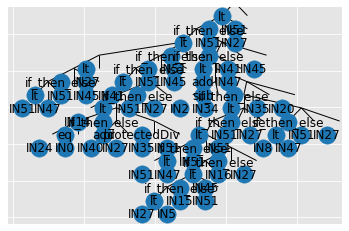

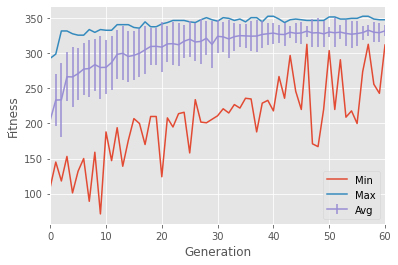

Best individual GP is lt(if_then_else(lt(if_then_else(lt(if_then_else(lt(IN51, IN47), IN51, IN45), IN27), if_then_else(lt(IN41, if_then_else(lt(IN14, if_then_else(eq(IN24, IN0), add(IN40, IN27), protectedDiv(IN35, IN51))), IN51, IN27)), IN51, IN45), IN51), if_then_else(lt(add(sub(IN2, IN34), if_then_else(lt(if_then_else(lt(if_then_else(lt(IN51, IN47), IN51, if_then_else(lt(if_then_else(lt(IN27, IN5), IN15, IN51), IN45), IN16, IN27)), IN51), IN51, IN27), if_then_else(lt(IN8, IN47), IN51, IN27)), IN35, IN20)), IN47), IN41, IN45)), IN51, IN27), IN51), (353.0,)


In [88]:
import sys
import time
import random
import operator
import csv
import itertools

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

import utils.utils_11.plot_utils as plot_utils
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 100               # population size for GP
GP_NGEN = 60                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.9, 0.05    # crossover and mutation probability for GP  #recommended values
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP
seed = 238842
"""
-------------------------------------------------------------------------
"""

# Read the spam list features and put it in a list of lists.
# The dataset is from http://archive.ics.uci.edu/ml/datasets/Spambase
# This example is a copy of the OpenBEAGLE example :
# http://beagle.gel.ulaval.ca/refmanual/beagle/html/d2/dbe/group__Spambase.html

with open("utils/utils_11/data/spambase.csv") as spambase:
    spamReader = csv.reader(spambase)
    spam = list(list(float(elem) for elem in row) for row in spamReader)

# defined a new primitive set for strongly typed GP
pset = gp.PrimitiveSetTyped("MAIN", itertools.repeat(float, 57), bool, "IN")

# boolean operators
pset.addPrimitive(operator.and_, [bool, bool], bool)
pset.addPrimitive(operator.or_, [bool, bool], bool)
pset.addPrimitive(operator.not_, [bool], bool)

# floating point operators
# Define a protected division function
def protectedDiv(left, right):
    try: return left / right
    except ZeroDivisionError: return 1

pset.addPrimitive(operator.add, [float,float], float)
pset.addPrimitive(operator.sub, [float,float], float)
pset.addPrimitive(operator.mul, [float,float], float)
pset.addPrimitive(protectedDiv, [float,float], float)

# logic operators
# Define a new if-then-else function
def if_then_else(input, output1, output2):
    if input: return output1
    else: return output2

pset.addPrimitive(operator.lt, [float, float], bool)
pset.addPrimitive(operator.eq, [float, float], bool)
pset.addPrimitive(if_then_else, [bool, float, float], float)

# terminals
try:
    pset.addEphemeralConstant("rand100", lambda: random.random() * 100, float)
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.addTerminal(False, bool)
pset.addTerminal(True, bool)

try:
    del creator.FitnessMaxSpam
    del creator.IndividualSpam
except:
    pass
creator.create("FitnessMaxSpam", base.Fitness, weights=(1.0,))
creator.create("IndividualSpam", gp.PrimitiveTree, fitness=creator.FitnessMaxSpam)
    
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.IndividualSpam, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalSpambase(individual):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # Randomly sample 400 mails in the spam database
    spam_samp = random.sample(spam, 400)
    # Evaluate the sum of correctly identified mail as spam
    result = sum(bool(func(*mail[:57])) is bool(mail[57]) for mail in spam_samp)
    return result,
    
toolbox.register("evaluate", evalSpambase)
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

#--------------------------------------------------------------------

random.seed(seed)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats, halloffame=hof)

#--------------------------------------------------------------------

# plot GP tree
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'spambase_'+str(seed),'results')

# plot fitness trends
plot_utils.plotTrends(logbook,'spambase_'+str(seed),'results')

#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))


### Pop_size analysis

0
{0: 'lt', 1: 'mul', 2: 'IN14', 3: 'IN24', 4: 'IN6'}
lt
1
{0: 'lt', 1: 'mul', 2: 'IN14', 3: 'IN24', 4: 'IN6'}
mul
2
{0: 'lt', 1: 'mul', 2: 'IN14', 3: 'IN24', 4: 'IN6'}
IN14
3
{0: 'lt', 1: 'mul', 2: 'IN14', 3: 'IN24', 4: 'IN6'}
IN24
4
{0: 'lt', 1: 'mul', 2: 'IN14', 3: 'IN24', 4: 'IN6'}
IN6


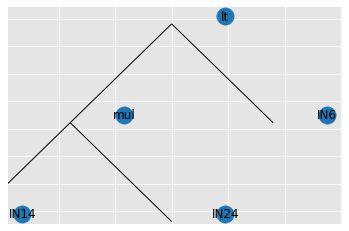

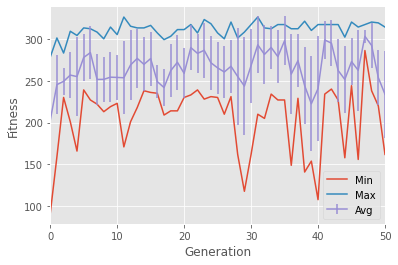

0
{0: 'lt', 1: 'protectedDiv', 2: 'protectedDiv', 3: 'protectedDiv', 4: 'protectedDiv', 5: 'protectedDiv', 6: 'protectedDiv', 7: 'protectedDiv', 8: 'sub', 9: 'IN56', 10: 'IN10', 11: 'if_then_else', 12: False, 13: 'IN51', 14: 'protectedDiv', 15: 'IN55', 16: 'IN53', 17: 'IN53', 18: 'IN56', 19: 'IN53', 20: 'IN56', 21: 'if_then_else', 22: False, 23: 'IN25', 24: 'if_then_else', 25: False, 26: 'IN25', 27: 'IN51', 28: 'if_then_else', 29: False, 30: 'IN25', 31: 'if_then_else', 32: False, 33: 'IN25', 34: 'IN51', 35: 'protectedDiv', 36: 'protectedDiv', 37: 'protectedDiv', 38: 'protectedDiv', 39: 'protectedDiv', 40: 'protectedDiv', 41: 'sub', 42: 'IN56', 43: 'IN10', 44: 'if_then_else', 45: False, 46: 'IN51', 47: 'protectedDiv', 48: 'IN55', 49: 'IN53', 50: 'IN53', 51: 'IN53', 52: 'IN56', 53: 'if_then_else', 54: False, 55: 'IN25', 56: 'IN51', 57: 'IN53'}
lt
1
{0: 'lt', 1: 'protectedDiv', 2: 'protectedDiv', 3: 'protectedDiv', 4: 'protectedDiv', 5: 'protectedDiv', 6: 'protectedDiv', 7: 'protectedDiv'

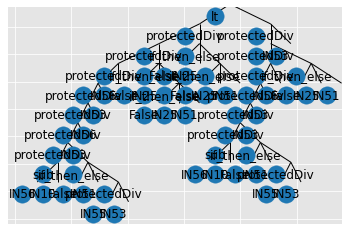

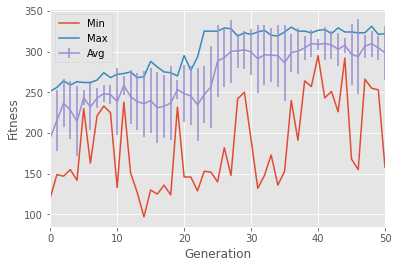

0
{0: 'lt', 1: 'IN32', 2: 'IN6'}
lt
1
{0: 'lt', 1: 'IN32', 2: 'IN6'}
IN32
2
{0: 'lt', 1: 'IN32', 2: 'IN6'}
IN6


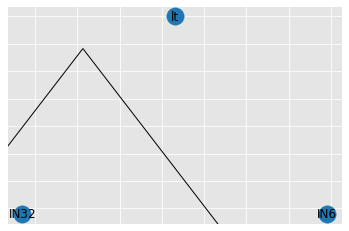

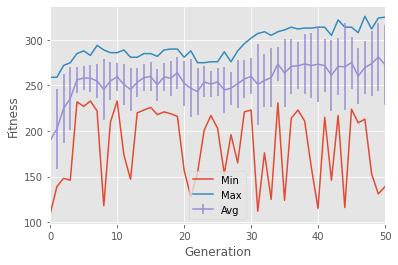

0
{0: 'lt', 1: 'IN24', 2: 'add', 3: 'if_then_else', 4: 'eq', 5: 'IN41', 6: 'IN23', 7: 'if_then_else', 8: 'eq', 9: 'IN25', 10: 'IN25', 11: 'IN4', 12: 'if_then_else', 13: 'eq', 14: 'IN25', 15: 'add', 16: 'if_then_else', 17: 'eq', 18: 'add', 19: 'if_then_else', 20: False, 21: 'IN51', 22: 'IN5', 23: 'mul', 24: 'IN25', 25: 'IN3', 26: 'IN24', 27: 'IN4', 28: 'add', 29: 'if_then_else', 30: True, 31: 'IN4', 32: 'add', 33: 'if_then_else', 34: True, 35: 'if_then_else', 36: 'and_', 37: True, 38: 'eq', 39: 'IN23', 40: 'IN24', 41: 'add', 42: 'IN53', 43: 'IN12', 44: 'protectedDiv', 45: 'IN20', 46: 'IN22', 47: 'add', 48: 'add', 49: 'add', 50: 'IN6', 51: 'IN10', 52: 'IN6', 53: 'IN6', 54: 'add', 55: 'add', 56: 'IN23', 57: 'add', 58: 'add', 59: 'IN23', 60: 'IN10', 61: 'IN6', 62: 'add', 63: 'add', 64: 'IN23', 65: 'IN10', 66: 'IN6', 67: 'add', 68: 'add', 69: 'IN23', 70: 'IN10', 71: 'IN8', 72: 'add', 73: 'add', 74: 'IN23', 75: 'IN10', 76: 'IN6', 77: 'add', 78: 'add', 79: 'IN23', 80: 'IN10', 81: 'IN6', 82: '

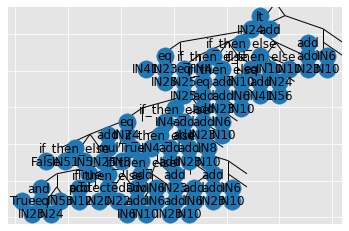

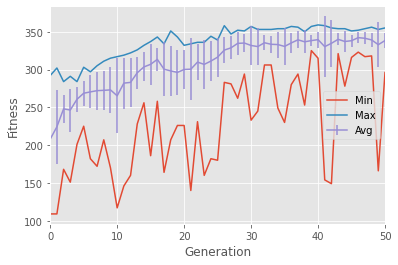

0
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'IN35', 4: 'IN17', 5: 'if_then_else', 6: 'lt', 7: 'IN41', 8: 'IN52', 9: 'IN52', 10: 'if_then_else', 11: True, 12: 'IN35', 13: 'IN52'}
lt
1
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'IN35', 4: 'IN17', 5: 'if_then_else', 6: 'lt', 7: 'IN41', 8: 'IN52', 9: 'IN52', 10: 'if_then_else', 11: True, 12: 'IN35', 13: 'IN52'}
if_then_else
2
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'IN35', 4: 'IN17', 5: 'if_then_else', 6: 'lt', 7: 'IN41', 8: 'IN52', 9: 'IN52', 10: 'if_then_else', 11: True, 12: 'IN35', 13: 'IN52'}
True
3
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'IN35', 4: 'IN17', 5: 'if_then_else', 6: 'lt', 7: 'IN41', 8: 'IN52', 9: 'IN52', 10: 'if_then_else', 11: True, 12: 'IN35', 13: 'IN52'}
IN35
4
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'IN35', 4: 'IN17', 5: 'if_then_else', 6: 'lt', 7: 'IN41', 8: 'IN52', 9: 'IN52', 10: 'if_then_else', 11: True, 12: 'IN35', 13: 'IN52'}
IN17
5
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'IN35', 4: 'IN17', 5: 'if_then_else', 6: 

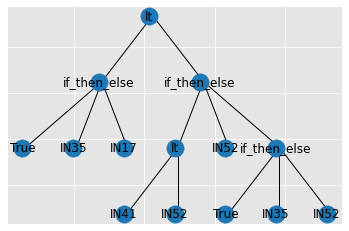

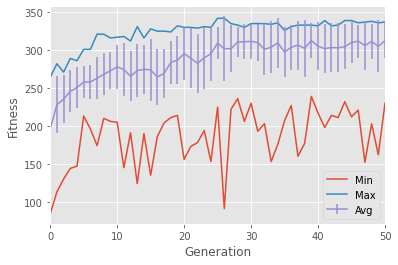

0
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN6', 4: 'IN6', 5: 'sub', 6: 'sub', 7: 'sub', 8: 'IN15', 9: 'sub', 10: 'sub', 11: 'sub', 12: 'IN25', 13: 'IN6', 14: 'IN6', 15: 'IN23', 16: 'IN25', 17: 'IN25', 18: 'sub', 19: 'IN25', 20: 'IN6'}
lt
1
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN6', 4: 'IN6', 5: 'sub', 6: 'sub', 7: 'sub', 8: 'IN15', 9: 'sub', 10: 'sub', 11: 'sub', 12: 'IN25', 13: 'IN6', 14: 'IN6', 15: 'IN23', 16: 'IN25', 17: 'IN25', 18: 'sub', 19: 'IN25', 20: 'IN6'}
sub
2
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN6', 4: 'IN6', 5: 'sub', 6: 'sub', 7: 'sub', 8: 'IN15', 9: 'sub', 10: 'sub', 11: 'sub', 12: 'IN25', 13: 'IN6', 14: 'IN6', 15: 'IN23', 16: 'IN25', 17: 'IN25', 18: 'sub', 19: 'IN25', 20: 'IN6'}
sub
3
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN6', 4: 'IN6', 5: 'sub', 6: 'sub', 7: 'sub', 8: 'IN15', 9: 'sub', 10: 'sub', 11: 'sub', 12: 'IN25', 13: 'IN6', 14: 'IN6', 15: 'IN23', 16: 'IN25', 17: 'IN25', 18: 'sub', 19: 'IN25', 20: 'IN6'}
IN6
4
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN6', 4: 'IN6', 5: 'sub', 6: 'sub

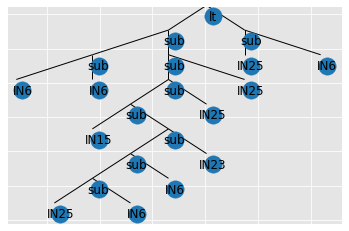

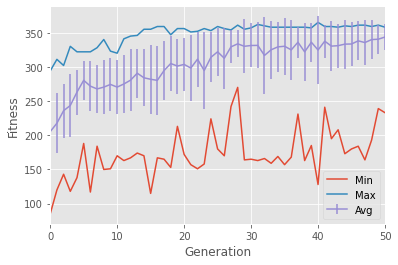

0
{0: 'lt', 1: 'IN25', 2: 'mul', 3: 'IN52', 4: 'IN52'}
lt
1
{0: 'lt', 1: 'IN25', 2: 'mul', 3: 'IN52', 4: 'IN52'}
IN25
2
{0: 'lt', 1: 'IN25', 2: 'mul', 3: 'IN52', 4: 'IN52'}
mul
3
{0: 'lt', 1: 'IN25', 2: 'mul', 3: 'IN52', 4: 'IN52'}
IN52
4
{0: 'lt', 1: 'IN25', 2: 'mul', 3: 'IN52', 4: 'IN52'}
IN52


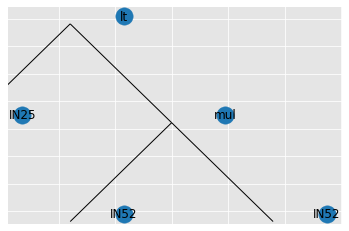

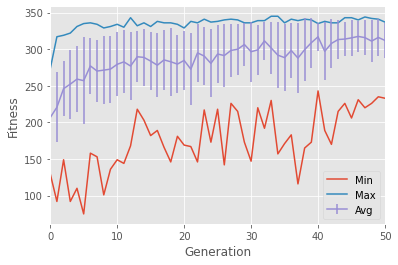

0
{0: 'lt', 1: 'sub', 2: 'if_then_else', 3: 'eq', 4: 'IN52', 5: 'IN54', 6: 'sub', 7: 'IN52', 8: 'IN54', 9: 'IN26', 10: 'add', 11: 'IN15', 12: 'IN52', 13: 'sub', 14: 'IN52', 15: 'IN24'}
lt
1
{0: 'lt', 1: 'sub', 2: 'if_then_else', 3: 'eq', 4: 'IN52', 5: 'IN54', 6: 'sub', 7: 'IN52', 8: 'IN54', 9: 'IN26', 10: 'add', 11: 'IN15', 12: 'IN52', 13: 'sub', 14: 'IN52', 15: 'IN24'}
sub
2
{0: 'lt', 1: 'sub', 2: 'if_then_else', 3: 'eq', 4: 'IN52', 5: 'IN54', 6: 'sub', 7: 'IN52', 8: 'IN54', 9: 'IN26', 10: 'add', 11: 'IN15', 12: 'IN52', 13: 'sub', 14: 'IN52', 15: 'IN24'}
if_then_else
3
{0: 'lt', 1: 'sub', 2: 'if_then_else', 3: 'eq', 4: 'IN52', 5: 'IN54', 6: 'sub', 7: 'IN52', 8: 'IN54', 9: 'IN26', 10: 'add', 11: 'IN15', 12: 'IN52', 13: 'sub', 14: 'IN52', 15: 'IN24'}
eq
4
{0: 'lt', 1: 'sub', 2: 'if_then_else', 3: 'eq', 4: 'IN52', 5: 'IN54', 6: 'sub', 7: 'IN52', 8: 'IN54', 9: 'IN26', 10: 'add', 11: 'IN15', 12: 'IN52', 13: 'sub', 14: 'IN52', 15: 'IN24'}
IN52
5
{0: 'lt', 1: 'sub', 2: 'if_then_else', 3: 'eq

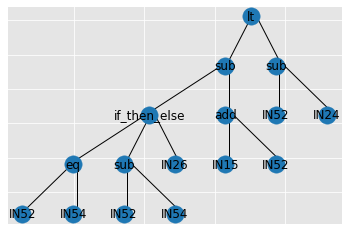

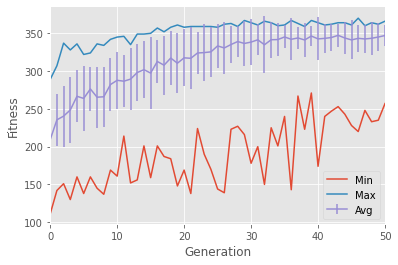

0
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN26', 4: 'IN23', 5: 'if_then_else', 6: True, 7: 'IN52', 8: 'if_then_else', 9: True, 10: 'IN6', 11: 'IN23', 12: 'IN6'}
lt
1
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN26', 4: 'IN23', 5: 'if_then_else', 6: True, 7: 'IN52', 8: 'if_then_else', 9: True, 10: 'IN6', 11: 'IN23', 12: 'IN6'}
sub
2
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN26', 4: 'IN23', 5: 'if_then_else', 6: True, 7: 'IN52', 8: 'if_then_else', 9: True, 10: 'IN6', 11: 'IN23', 12: 'IN6'}
sub
3
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN26', 4: 'IN23', 5: 'if_then_else', 6: True, 7: 'IN52', 8: 'if_then_else', 9: True, 10: 'IN6', 11: 'IN23', 12: 'IN6'}
IN26
4
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN26', 4: 'IN23', 5: 'if_then_else', 6: True, 7: 'IN52', 8: 'if_then_else', 9: True, 10: 'IN6', 11: 'IN23', 12: 'IN6'}
IN23
5
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'IN26', 4: 'IN23', 5: 'if_then_else', 6: True, 7: 'IN52', 8: 'if_then_else', 9: True, 10: 'IN6', 11: 'IN23', 12: 'IN6'}
if_then_else
6
{0: 'lt', 1: 'sub', 2: 'sub', 3: '

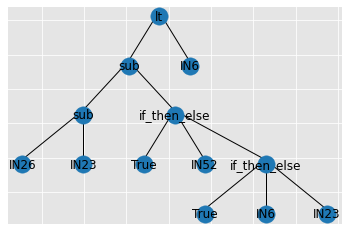

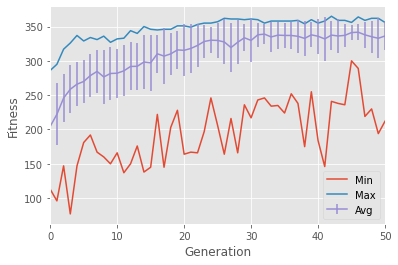

0
{0: 'lt', 1: 'IN24', 2: 'if_then_else', 3: 'and_', 4: False, 5: False, 6: 'if_then_else', 7: 'and_', 8: False, 9: True, 10: 'if_then_else', 11: True, 12: 'if_then_else', 13: 'and_', 14: False, 15: True, 16: 'IN24', 17: 'if_then_else', 18: False, 19: 'IN24', 20: 'mul', 21: 'IN52', 22: 'if_then_else', 23: False, 24: 'if_then_else', 25: True, 26: 'IN52', 27: 'IN52', 28: 'IN52', 29: 'if_then_else', 30: False, 31: 'IN51', 32: 'IN17', 33: 'IN27', 34: 'IN52'}
lt
1
{0: 'lt', 1: 'IN24', 2: 'if_then_else', 3: 'and_', 4: False, 5: False, 6: 'if_then_else', 7: 'and_', 8: False, 9: True, 10: 'if_then_else', 11: True, 12: 'if_then_else', 13: 'and_', 14: False, 15: True, 16: 'IN24', 17: 'if_then_else', 18: False, 19: 'IN24', 20: 'mul', 21: 'IN52', 22: 'if_then_else', 23: False, 24: 'if_then_else', 25: True, 26: 'IN52', 27: 'IN52', 28: 'IN52', 29: 'if_then_else', 30: False, 31: 'IN51', 32: 'IN17', 33: 'IN27', 34: 'IN52'}
IN24
2
{0: 'lt', 1: 'IN24', 2: 'if_then_else', 3: 'and_', 4: False, 5: False, 6

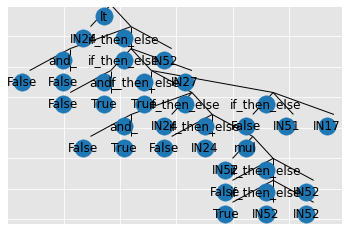

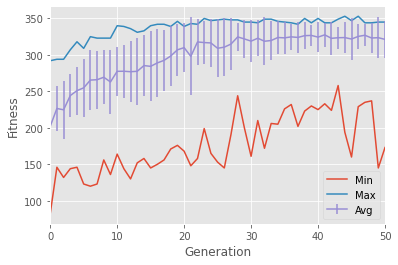

0
{0: 'lt', 1: 'sub', 2: 'IN40', 3: 'add', 4: 'IN6', 5: 'add', 6: 'add', 7: 'add', 8: 'IN23', 9: 'IN15', 10: 'IN22', 11: 'IN19', 12: 'add', 13: 'add', 14: 'IN6', 15: 'add', 16: 'sub', 17: 'mul', 18: 'IN22', 19: 'IN15', 20: 'IN25', 21: 'add', 22: 'IN40', 23: 'add', 24: 'add', 25: 'add', 26: 'add', 27: 'add', 28: 'IN22', 29: 'IN15', 30: 'sub', 31: 'mul', 32: 'IN22', 33: 'IN15', 34: 'add', 35: 'add', 36: 'add', 37: 'add', 38: 'IN23', 39: 'IN15', 40: 'IN22', 41: 'IN6', 42: 'IN25', 43: 'IN6', 44: 'IN22', 45: 'add', 46: 'IN6', 47: 'add', 48: 'IN19', 49: 'add', 50: 'add', 51: 'IN6', 52: 'add', 53: 'if_then_else', 54: True, 55: 'IN23', 56: 'sub', 57: 'IN40', 58: 'add', 59: 'IN6', 60: 'sub', 61: 'sub', 62: 'IN22', 63: 'IN15', 64: 'sub', 65: 'sub', 66: 'add', 67: 'add', 68: 'add', 69: 'IN23', 70: 'IN15', 71: 'IN15', 72: 'add', 73: 'add', 74: 'add', 75: 'IN23', 76: 'IN22', 77: 'add', 78: 'add', 79: 'add', 80: 'IN15', 81: 'sub', 82: 'sub', 83: 'IN22', 84: 'IN15', 85: 'sub', 86: 'sub', 87: 'add', 8

add
141
{0: 'lt', 1: 'sub', 2: 'IN40', 3: 'add', 4: 'IN6', 5: 'add', 6: 'add', 7: 'add', 8: 'IN23', 9: 'IN15', 10: 'IN22', 11: 'IN19', 12: 'add', 13: 'add', 14: 'IN6', 15: 'add', 16: 'sub', 17: 'mul', 18: 'IN22', 19: 'IN15', 20: 'IN25', 21: 'add', 22: 'IN40', 23: 'add', 24: 'add', 25: 'add', 26: 'add', 27: 'add', 28: 'IN22', 29: 'IN15', 30: 'sub', 31: 'mul', 32: 'IN22', 33: 'IN15', 34: 'add', 35: 'add', 36: 'add', 37: 'add', 38: 'IN23', 39: 'IN15', 40: 'IN22', 41: 'IN6', 42: 'IN25', 43: 'IN6', 44: 'IN22', 45: 'add', 46: 'IN6', 47: 'add', 48: 'IN19', 49: 'add', 50: 'add', 51: 'IN6', 52: 'add', 53: 'if_then_else', 54: True, 55: 'IN23', 56: 'sub', 57: 'IN40', 58: 'add', 59: 'IN6', 60: 'sub', 61: 'sub', 62: 'IN22', 63: 'IN15', 64: 'sub', 65: 'sub', 66: 'add', 67: 'add', 68: 'add', 69: 'IN23', 70: 'IN15', 71: 'IN15', 72: 'add', 73: 'add', 74: 'add', 75: 'IN23', 76: 'IN22', 77: 'add', 78: 'add', 79: 'add', 80: 'IN15', 81: 'sub', 82: 'sub', 83: 'IN22', 84: 'IN15', 85: 'sub', 86: 'sub', 87: 'a

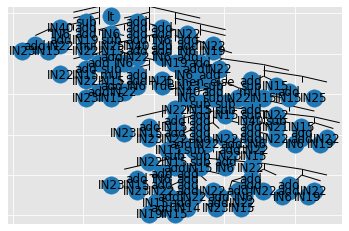

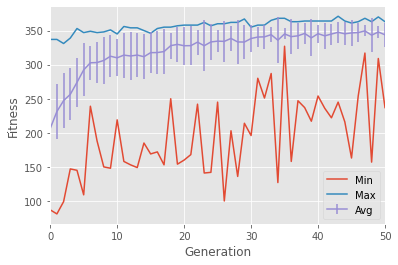

0
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'protectedDiv', 4: 'if_then_else', 5: True, 6: 'IN43', 7: 'protectedDiv', 8: 'if_then_else', 9: True, 10: 'IN43', 11: 'IN43', 12: 'protectedDiv', 13: 'IN56', 14: 'IN31', 15: 'add', 16: 'IN6', 17: 'IN52', 18: 'if_then_else', 19: True, 20: 'protectedDiv', 21: 'IN27', 22: 'IN27', 23: 'IN52', 24: 'add', 25: 'IN51', 26: 'IN6'}
lt
1
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'protectedDiv', 4: 'if_then_else', 5: True, 6: 'IN43', 7: 'protectedDiv', 8: 'if_then_else', 9: True, 10: 'IN43', 11: 'IN43', 12: 'protectedDiv', 13: 'IN56', 14: 'IN31', 15: 'add', 16: 'IN6', 17: 'IN52', 18: 'if_then_else', 19: True, 20: 'protectedDiv', 21: 'IN27', 22: 'IN27', 23: 'IN52', 24: 'add', 25: 'IN51', 26: 'IN6'}
if_then_else
2
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'protectedDiv', 4: 'if_then_else', 5: True, 6: 'IN43', 7: 'protectedDiv', 8: 'if_then_else', 9: True, 10: 'IN43', 11: 'IN43', 12: 'protectedDiv', 13: 'IN56', 14: 'IN31', 15: 'add', 16: 'IN6', 17: 'IN52', 18:

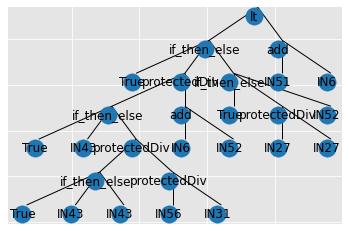

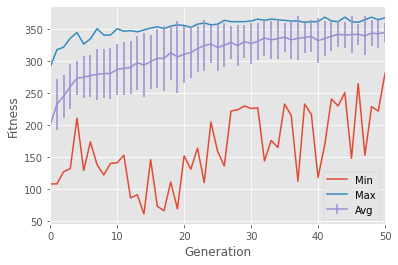

0
{0: 'lt', 1: 'add', 2: 'IN45', 3: 'add', 4: 'add', 5: 'add', 6: 'IN40', 7: 'if_then_else', 8: False, 9: 'add', 10: 'IN51', 11: 'IN24', 12: 'add', 13: 'IN40', 14: 'if_then_else', 15: False, 16: 'add', 17: 'IN40', 18: 'if_then_else', 19: False, 20: 'IN51', 21: 'IN24', 22: 'IN24', 23: 'if_then_else', 24: False, 25: 'mul', 26: 'IN20', 27: 'IN27', 28: 'mul', 29: 'IN26', 30: 'add', 31: 'add', 32: 'add', 33: 'IN40', 34: 'IN26', 35: 'if_then_else', 36: False, 37: 'IN40', 38: 'add', 39: 'add', 40: 'IN40', 41: 'if_then_else', 42: False, 43: 'add', 44: 'IN40', 45: 'IN40', 46: 'IN45', 47: 'if_then_else', 48: False, 49: 'IN40', 50: 'mul', 51: 'IN26', 52: 'IN56', 53: 'if_then_else', 54: 'eq', 55: 'IN27', 56: 'IN24', 57: 'IN46', 58: 'IN24', 59: 'if_then_else', 60: False, 61: 'IN46', 62: 'IN25', 63: 'IN51'}
lt
1
{0: 'lt', 1: 'add', 2: 'IN45', 3: 'add', 4: 'add', 5: 'add', 6: 'IN40', 7: 'if_then_else', 8: False, 9: 'add', 10: 'IN51', 11: 'IN24', 12: 'add', 13: 'IN40', 14: 'if_then_else', 15: False, 1

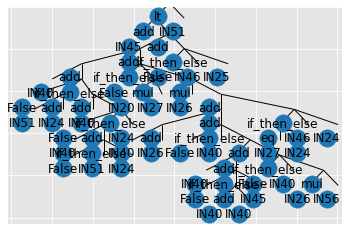

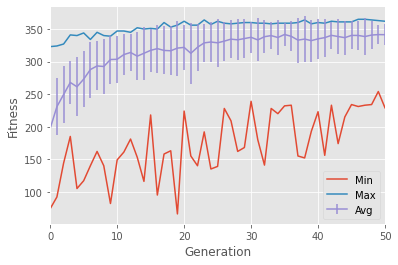

0
{0: 'lt', 1: 'mul', 2: 'if_then_else', 3: True, 4: 'IN25', 5: 'IN25', 6: 'IN25', 7: 'IN51'}
lt
1
{0: 'lt', 1: 'mul', 2: 'if_then_else', 3: True, 4: 'IN25', 5: 'IN25', 6: 'IN25', 7: 'IN51'}
mul
2
{0: 'lt', 1: 'mul', 2: 'if_then_else', 3: True, 4: 'IN25', 5: 'IN25', 6: 'IN25', 7: 'IN51'}
if_then_else
3
{0: 'lt', 1: 'mul', 2: 'if_then_else', 3: True, 4: 'IN25', 5: 'IN25', 6: 'IN25', 7: 'IN51'}
True
4
{0: 'lt', 1: 'mul', 2: 'if_then_else', 3: True, 4: 'IN25', 5: 'IN25', 6: 'IN25', 7: 'IN51'}
IN25
5
{0: 'lt', 1: 'mul', 2: 'if_then_else', 3: True, 4: 'IN25', 5: 'IN25', 6: 'IN25', 7: 'IN51'}
IN25
6
{0: 'lt', 1: 'mul', 2: 'if_then_else', 3: True, 4: 'IN25', 5: 'IN25', 6: 'IN25', 7: 'IN51'}
IN25
7
{0: 'lt', 1: 'mul', 2: 'if_then_else', 3: True, 4: 'IN25', 5: 'IN25', 6: 'IN25', 7: 'IN51'}
IN51


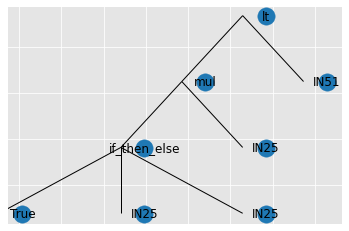

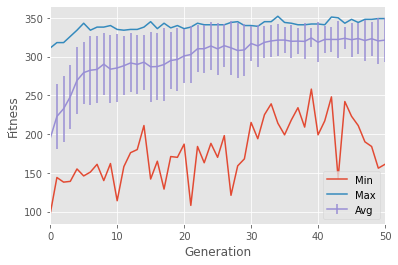

0
{0: 'lt', 1: 'add', 2: 'IN36', 3: 'IN26', 4: 'mul', 5: 'protectedDiv', 6: 'add', 7: 'IN15', 8: 'IN45', 9: 'IN15', 10: 'IN51'}
lt
1
{0: 'lt', 1: 'add', 2: 'IN36', 3: 'IN26', 4: 'mul', 5: 'protectedDiv', 6: 'add', 7: 'IN15', 8: 'IN45', 9: 'IN15', 10: 'IN51'}
add
2
{0: 'lt', 1: 'add', 2: 'IN36', 3: 'IN26', 4: 'mul', 5: 'protectedDiv', 6: 'add', 7: 'IN15', 8: 'IN45', 9: 'IN15', 10: 'IN51'}
IN36
3
{0: 'lt', 1: 'add', 2: 'IN36', 3: 'IN26', 4: 'mul', 5: 'protectedDiv', 6: 'add', 7: 'IN15', 8: 'IN45', 9: 'IN15', 10: 'IN51'}
IN26
4
{0: 'lt', 1: 'add', 2: 'IN36', 3: 'IN26', 4: 'mul', 5: 'protectedDiv', 6: 'add', 7: 'IN15', 8: 'IN45', 9: 'IN15', 10: 'IN51'}
mul
5
{0: 'lt', 1: 'add', 2: 'IN36', 3: 'IN26', 4: 'mul', 5: 'protectedDiv', 6: 'add', 7: 'IN15', 8: 'IN45', 9: 'IN15', 10: 'IN51'}
protectedDiv
6
{0: 'lt', 1: 'add', 2: 'IN36', 3: 'IN26', 4: 'mul', 5: 'protectedDiv', 6: 'add', 7: 'IN15', 8: 'IN45', 9: 'IN15', 10: 'IN51'}
add
7
{0: 'lt', 1: 'add', 2: 'IN36', 3: 'IN26', 4: 'mul', 5: 'protecte

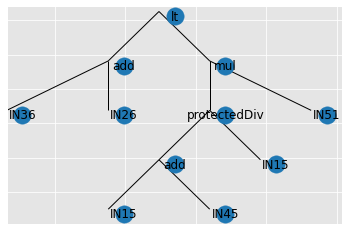

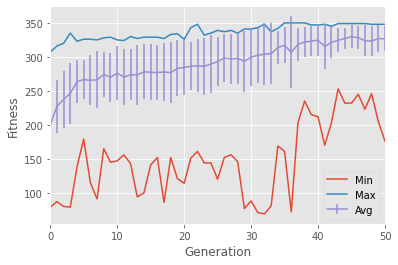

In [112]:
best_fitnesses = []
lens = []
for pop in range(10,160,10):

    pop = toolbox.population(n=pop)
    hof = tools.HallOfFame(GP_HOF_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    
    # Save the current stdout and redirect to the dummy object

    final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                          stats, halloffame=hof, verbose = False)
    
    nodes, edges, labels = gp.graph(hof[0])
    
    plot_utils.plotTree(nodes,edges,labels,'spambase_'+str(seed),'results')
    
    # plot fitness trends
    plot_utils.plotTrends(logbook,'spambase_'+str(seed),'results')
    
    best_fitnesses.append(hof[0].fitness.values)
    lens.append(len(hof[0]))

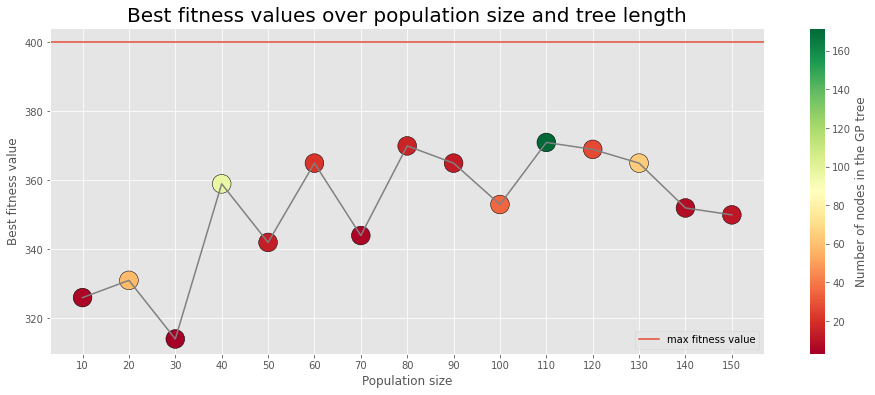

In [143]:
x = [i for i in range(10,160,10)]
plt.figure(figsize=(16,6))
plt.scatter(x,best_fitnesses, s = 350, c=lens, cmap='RdYlGn', edgecolor = "black")
plt.plot(x,best_fitnesses, color = "grey")
plt.xticks(range(10, 160, 10))
plt.colorbar(label='Number of nodes in the GP tree')
plt.xlabel("Population size")
plt.ylabel("Best fitness value")
plt.axhline(y = 400, label = "max fitness value")
plt.legend(loc="best")
plt.title("Best fitness values over population size and tree length", fontsize = 20)
plt.show()

### n_gen analysis

0
{0: 'not_', 1: 'eq', 2: 'IN6', 3: 'IN52'}
not_
1
{0: 'not_', 1: 'eq', 2: 'IN6', 3: 'IN52'}
eq
2
{0: 'not_', 1: 'eq', 2: 'IN6', 3: 'IN52'}
IN6
3
{0: 'not_', 1: 'eq', 2: 'IN6', 3: 'IN52'}
IN52


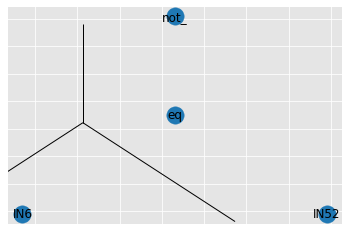

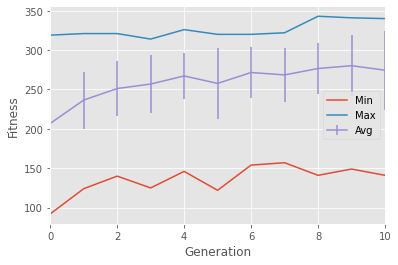

0
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'IN15', 4: 'IN23'}
lt
1
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'IN15', 4: 'IN23'}
IN36
2
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'IN15', 4: 'IN23'}
add
3
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'IN15', 4: 'IN23'}
IN15
4
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'IN15', 4: 'IN23'}
IN23


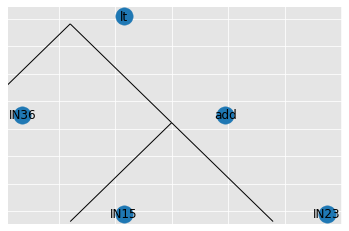

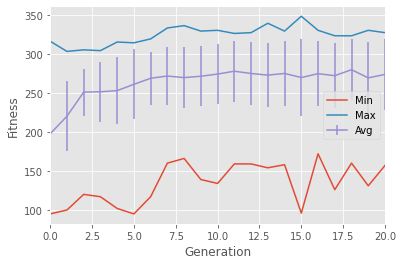

0
{0: 'or_', 1: 'lt', 2: 'IN32', 3: 'IN52', 4: 'lt', 5: 'IN32', 6: 'IN6'}
or_
1
{0: 'or_', 1: 'lt', 2: 'IN32', 3: 'IN52', 4: 'lt', 5: 'IN32', 6: 'IN6'}
lt
2
{0: 'or_', 1: 'lt', 2: 'IN32', 3: 'IN52', 4: 'lt', 5: 'IN32', 6: 'IN6'}
IN32
3
{0: 'or_', 1: 'lt', 2: 'IN32', 3: 'IN52', 4: 'lt', 5: 'IN32', 6: 'IN6'}
IN52
4
{0: 'or_', 1: 'lt', 2: 'IN32', 3: 'IN52', 4: 'lt', 5: 'IN32', 6: 'IN6'}
lt
5
{0: 'or_', 1: 'lt', 2: 'IN32', 3: 'IN52', 4: 'lt', 5: 'IN32', 6: 'IN6'}
IN32
6
{0: 'or_', 1: 'lt', 2: 'IN32', 3: 'IN52', 4: 'lt', 5: 'IN32', 6: 'IN6'}
IN6


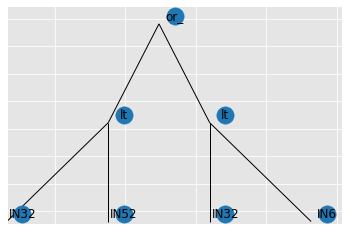

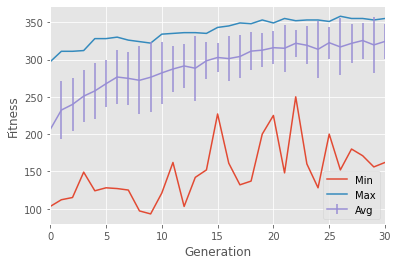

0
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'add', 4: 'IN6', 5: 'IN15', 6: 'IN52'}
lt
1
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'add', 4: 'IN6', 5: 'IN15', 6: 'IN52'}
IN36
2
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'add', 4: 'IN6', 5: 'IN15', 6: 'IN52'}
add
3
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'add', 4: 'IN6', 5: 'IN15', 6: 'IN52'}
add
4
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'add', 4: 'IN6', 5: 'IN15', 6: 'IN52'}
IN6
5
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'add', 4: 'IN6', 5: 'IN15', 6: 'IN52'}
IN15
6
{0: 'lt', 1: 'IN36', 2: 'add', 3: 'add', 4: 'IN6', 5: 'IN15', 6: 'IN52'}
IN52


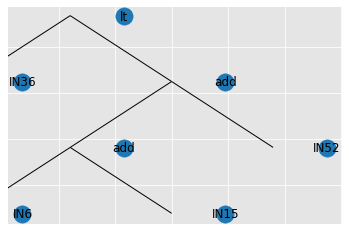

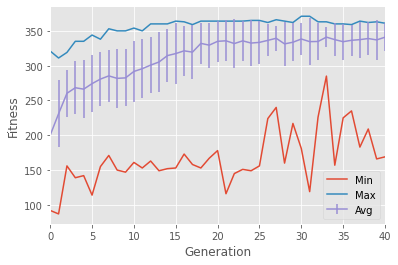

0
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'sub', 4: 'IN48', 5: 'IN15', 6: 'sub', 7: 'IN52', 8: 'IN34', 9: 'IN15', 10: 'if_then_else', 11: False, 12: 'if_then_else', 13: False, 14: 'sub', 15: 'sub', 16: 'IN52', 17: 'IN34', 18: 'sub', 19: 'sub', 20: 'IN48', 21: 'IN15', 22: 'sub', 23: 'IN52', 24: 'IN34', 25: 'if_then_else', 26: False, 27: 'IN42', 28: 'IN6', 29: 'IN6'}
lt
1
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'sub', 4: 'IN48', 5: 'IN15', 6: 'sub', 7: 'IN52', 8: 'IN34', 9: 'IN15', 10: 'if_then_else', 11: False, 12: 'if_then_else', 13: False, 14: 'sub', 15: 'sub', 16: 'IN52', 17: 'IN34', 18: 'sub', 19: 'sub', 20: 'IN48', 21: 'IN15', 22: 'sub', 23: 'IN52', 24: 'IN34', 25: 'if_then_else', 26: False, 27: 'IN42', 28: 'IN6', 29: 'IN6'}
sub
2
{0: 'lt', 1: 'sub', 2: 'sub', 3: 'sub', 4: 'IN48', 5: 'IN15', 6: 'sub', 7: 'IN52', 8: 'IN34', 9: 'IN15', 10: 'if_then_else', 11: False, 12: 'if_then_else', 13: False, 14: 'sub', 15: 'sub', 16: 'IN52', 17: 'IN34', 18: 'sub', 19: 'sub', 20: 'IN48', 21: 'IN15', 22: 'sub',

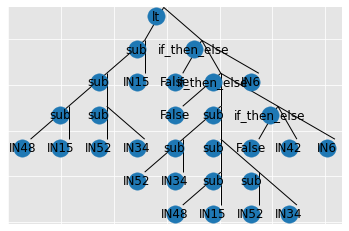

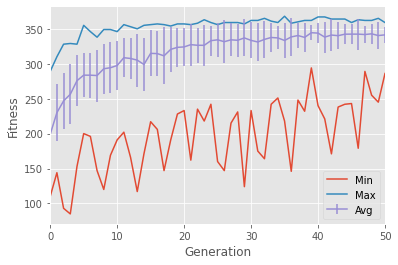

0
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'sub', 4: 'mul', 5: 'IN56', 6: 'sub', 7: 'IN24', 8: 'IN6', 9: 'IN20', 10: 'IN6', 11: 'mul', 12: 'if_then_else', 13: True, 14: 'mul', 15: 'IN6', 16: 'IN20', 17: 'IN20', 18: 'IN6'}
lt
1
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'sub', 4: 'mul', 5: 'IN56', 6: 'sub', 7: 'IN24', 8: 'IN6', 9: 'IN20', 10: 'IN6', 11: 'mul', 12: 'if_then_else', 13: True, 14: 'mul', 15: 'IN6', 16: 'IN20', 17: 'IN20', 18: 'IN6'}
if_then_else
2
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'sub', 4: 'mul', 5: 'IN56', 6: 'sub', 7: 'IN24', 8: 'IN6', 9: 'IN20', 10: 'IN6', 11: 'mul', 12: 'if_then_else', 13: True, 14: 'mul', 15: 'IN6', 16: 'IN20', 17: 'IN20', 18: 'IN6'}
True
3
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'sub', 4: 'mul', 5: 'IN56', 6: 'sub', 7: 'IN24', 8: 'IN6', 9: 'IN20', 10: 'IN6', 11: 'mul', 12: 'if_then_else', 13: True, 14: 'mul', 15: 'IN6', 16: 'IN20', 17: 'IN20', 18: 'IN6'}
sub
4
{0: 'lt', 1: 'if_then_else', 2: True, 3: 'sub', 4: 'mul', 5: 'IN56', 6: 'sub', 7: 'IN

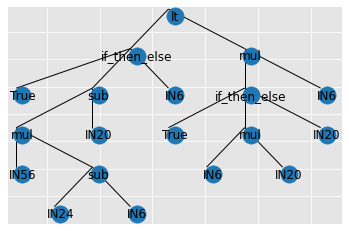

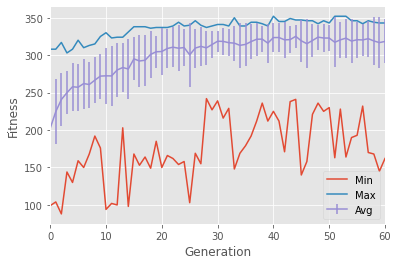

0
{0: 'lt', 1: 'sub', 2: 'IN24', 3: 'mul', 4: 'mul', 5: 'sub', 6: 'protectedDiv', 7: 'if_then_else', 8: True, 9: 'mul', 10: 'sub', 11: 'IN51', 12: 'mul', 13: 'sub', 14: 'IN24', 15: 'IN39', 16: 'IN51', 17: 'sub', 18: 'IN40', 19: 'IN7', 20: 'IN26', 21: 'IN20', 22: 'mul', 23: 'mul', 24: 'mul', 25: 'IN51', 26: 'IN8', 27: 'IN32', 28: 'IN51', 29: 'IN51', 30: 'IN8', 31: 'mul', 32: 'IN51', 33: 'IN20'}
lt
1
{0: 'lt', 1: 'sub', 2: 'IN24', 3: 'mul', 4: 'mul', 5: 'sub', 6: 'protectedDiv', 7: 'if_then_else', 8: True, 9: 'mul', 10: 'sub', 11: 'IN51', 12: 'mul', 13: 'sub', 14: 'IN24', 15: 'IN39', 16: 'IN51', 17: 'sub', 18: 'IN40', 19: 'IN7', 20: 'IN26', 21: 'IN20', 22: 'mul', 23: 'mul', 24: 'mul', 25: 'IN51', 26: 'IN8', 27: 'IN32', 28: 'IN51', 29: 'IN51', 30: 'IN8', 31: 'mul', 32: 'IN51', 33: 'IN20'}
sub
2
{0: 'lt', 1: 'sub', 2: 'IN24', 3: 'mul', 4: 'mul', 5: 'sub', 6: 'protectedDiv', 7: 'if_then_else', 8: True, 9: 'mul', 10: 'sub', 11: 'IN51', 12: 'mul', 13: 'sub', 14: 'IN24', 15: 'IN39', 16: 'IN51'

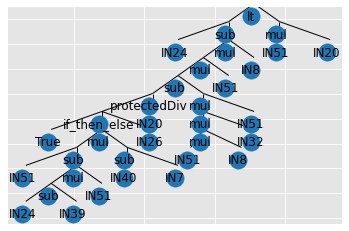

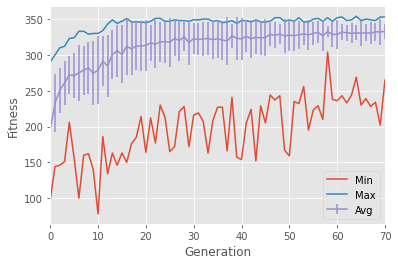

0
{0: 'and_', 1: 'lt', 2: 'sub', 3: 'IN25', 4: 'IN51', 5: 'IN51', 6: 'lt', 7: 'protectedDiv', 8: 'IN36', 9: 'IN20', 10: 'IN51'}
and_
1
{0: 'and_', 1: 'lt', 2: 'sub', 3: 'IN25', 4: 'IN51', 5: 'IN51', 6: 'lt', 7: 'protectedDiv', 8: 'IN36', 9: 'IN20', 10: 'IN51'}
lt
2
{0: 'and_', 1: 'lt', 2: 'sub', 3: 'IN25', 4: 'IN51', 5: 'IN51', 6: 'lt', 7: 'protectedDiv', 8: 'IN36', 9: 'IN20', 10: 'IN51'}
sub
3
{0: 'and_', 1: 'lt', 2: 'sub', 3: 'IN25', 4: 'IN51', 5: 'IN51', 6: 'lt', 7: 'protectedDiv', 8: 'IN36', 9: 'IN20', 10: 'IN51'}
IN25
4
{0: 'and_', 1: 'lt', 2: 'sub', 3: 'IN25', 4: 'IN51', 5: 'IN51', 6: 'lt', 7: 'protectedDiv', 8: 'IN36', 9: 'IN20', 10: 'IN51'}
IN51
5
{0: 'and_', 1: 'lt', 2: 'sub', 3: 'IN25', 4: 'IN51', 5: 'IN51', 6: 'lt', 7: 'protectedDiv', 8: 'IN36', 9: 'IN20', 10: 'IN51'}
IN51
6
{0: 'and_', 1: 'lt', 2: 'sub', 3: 'IN25', 4: 'IN51', 5: 'IN51', 6: 'lt', 7: 'protectedDiv', 8: 'IN36', 9: 'IN20', 10: 'IN51'}
lt
7
{0: 'and_', 1: 'lt', 2: 'sub', 3: 'IN25', 4: 'IN51', 5: 'IN51', 6: 'lt',

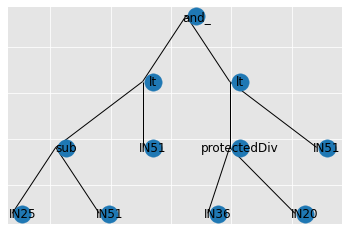

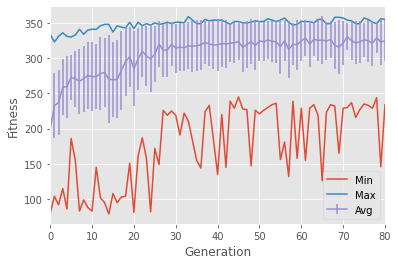

0
{0: 'and_', 1: 'lt', 2: 'sub', 3: 'sub', 4: 'add', 5: 'IN24', 6: 'sub', 7: 'sub', 8: 'add', 9: 'IN45', 10: 'IN42', 11: 'IN15', 12: 'IN52', 13: 'IN19', 14: 'IN52', 15: 'IN23', 16: 'or_', 17: 'lt', 18: 'sub', 19: 'IN2', 20: 'IN40', 21: 'IN23', 22: 'or_', 23: 'or_', 24: 'or_', 25: 'or_', 26: 'or_', 27: 'lt', 28: 'sub', 29: 'sub', 30: 'add', 31: 'IN24', 32: 'sub', 33: 'IN26', 34: 'IN15', 35: 'IN19', 36: 'IN52', 37: 'IN23', 38: True, 39: 'lt', 40: 'sub', 41: 'sub', 42: 'add', 43: 'IN24', 44: 'IN42', 45: 'IN15', 46: 'IN52', 47: 'IN23', 48: 'or_', 49: True, 50: 'or_', 51: 'or_', 52: 'lt', 53: 'sub', 54: 'sub', 55: 'add', 56: 'IN24', 57: 'sub', 58: 'add', 59: 'IN24', 60: 'sub', 61: 'sub', 62: 'add', 63: 'IN45', 64: 'IN42', 65: 'IN15', 66: 'IN52', 67: 'IN19', 68: 'IN15', 69: 'IN52', 70: 'IN23', 71: 'or_', 72: 'or_', 73: 'or_', 74: True, 75: 'eq', 76: 'IN52', 77: 'IN14', 78: 'lt', 79: 'sub', 80: 'sub', 81: 'mul', 82: 'IN11', 83: 'IN46', 84: 'sub', 85: 'IN41', 86: 'IN52', 87: 'IN52', 88: 'IN23'

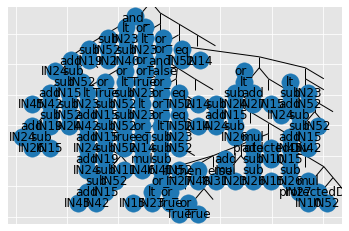

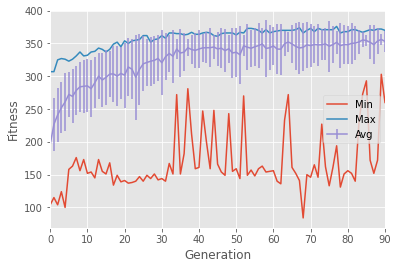

0
{0: 'lt', 1: 'add', 2: 'IN24', 3: 'IN24', 4: 'add', 5: 'IN52', 6: 'mul', 7: 'add', 8: 'IN14', 9: 'IN10', 10: 'if_then_else', 11: 'and_', 12: 'and_', 13: 'not_', 14: 'eq', 15: 'add', 16: 'if_then_else', 17: 'lt', 18: 'IN34', 19: 'IN45', 20: 'protectedDiv', 21: 'add', 22: 'IN32', 23: 'IN52', 24: 'IN20', 25: 'if_then_else', 26: 'eq', 27: 'mul', 28: 'IN7', 29: 'IN34', 30: 'IN28', 31: 'IN52', 32: 'IN24', 33: 'IN10', 34: 'IN14', 35: True, 36: 'and_', 37: 'and_', 38: 'not_', 39: True, 40: 'and_', 41: 'eq', 42: 'IN34', 43: 'IN10', 44: True, 45: True, 46: 'protectedDiv', 47: 'IN24', 48: 'if_then_else', 49: 'not_', 50: 'lt', 51: 'IN34', 52: 'IN45', 53: 'IN35', 54: 'sub', 55: 'add', 56: 'IN14', 57: 'IN28', 58: 'IN20', 59: 'protectedDiv', 60: 'add', 61: 'IN28', 62: 'if_then_else', 63: 'not_', 64: 'lt', 65: 'IN34', 66: 'IN45', 67: 'IN52', 68: 'if_then_else', 69: 'eq', 70: 'add', 71: 'if_then_else', 72: 'and_', 73: 'not_', 74: 'not_', 75: 'eq', 76: 'add', 77: 'if_then_else', 78: True, 79: 'protect

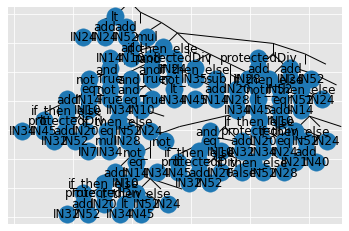

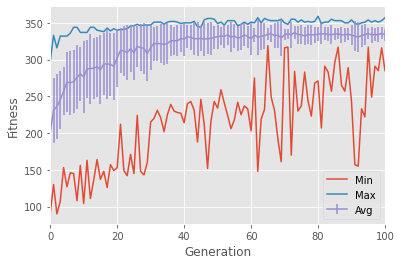

In [144]:
best_fitnesses = []
lens = []
POP_size = 110
for gen in range(10,110,10):

    pop = toolbox.population(n=POP_size)
    hof = tools.HallOfFame(GP_HOF_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    
    # Save the current stdout and redirect to the dummy object

    final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, gen, \
                                          stats, halloffame=hof, verbose = False)
    
    nodes, edges, labels = gp.graph(hof[0])
    
    plot_utils.plotTree(nodes,edges,labels,'spambase_'+str(seed),'results')
    
    # plot fitness trends
    plot_utils.plotTrends(logbook,'spambase_'+str(seed),'results')
    
    best_fitnesses.append(hof[0].fitness.values)
    lens.append(len(hof[0]))

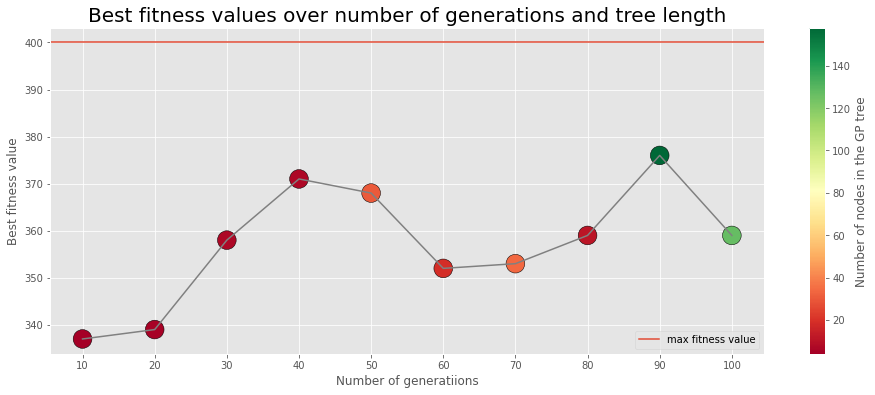

In [145]:
x = [i for i in range(10,110,10)]
plt.figure(figsize=(16,6))
plt.scatter(x,best_fitnesses, s = 350, c=lens, cmap='RdYlGn', edgecolor = "black")
plt.plot(x,best_fitnesses, color = "grey")
plt.xticks(range(10, 110, 10))
plt.colorbar(label='Number of nodes in the GP tree')
plt.xlabel("Number of generations")
plt.ylabel("Best fitness value")
plt.axhline(y = 400, label = "max fitness value")
plt.legend(loc="best")
plt.title("Best fitness values over number of generations and tree length", fontsize = 20)
plt.show()

# Ant problem

0
{0: 'if_food_ahead', 1: 'if_food_ahead', 2: 'move_forward', 3: 'move_forward', 4: 'prog2', 5: 'prog3', 6: 'prog2', 7: 'if_food_ahead', 8: 'move_forward', 9: 'if_food_ahead', 10: 'move_forward', 11: 'prog2', 12: 'if_food_ahead', 13: 'move_forward', 14: 'if_food_ahead', 15: 'prog2', 16: 'turn_left', 17: 'prog2', 18: 'turn_left', 19: 'move_forward', 20: 'prog3', 21: 'prog2', 22: 'turn_left', 23: 'move_forward', 24: 'move_forward', 25: 'move_forward', 26: 'move_forward', 27: 'move_forward', 28: 'prog2', 29: 'prog3', 30: 'prog2', 31: 'if_food_ahead', 32: 'move_forward', 33: 'prog3', 34: 'prog2', 35: 'turn_left', 36: 'move_forward', 37: 'move_forward', 38: 'move_forward', 39: 'move_forward', 40: 'move_forward', 41: 'turn_right', 42: 'move_forward', 43: 'turn_right', 44: 'move_forward'}
if_food_ahead
1
{0: 'if_food_ahead', 1: 'if_food_ahead', 2: 'move_forward', 3: 'move_forward', 4: 'prog2', 5: 'prog3', 6: 'prog2', 7: 'if_food_ahead', 8: 'move_forward', 9: 'if_food_ahead', 10: 'move_forward

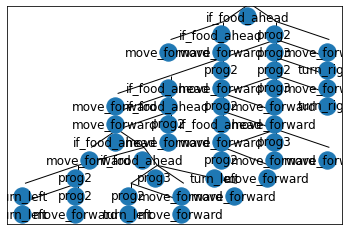

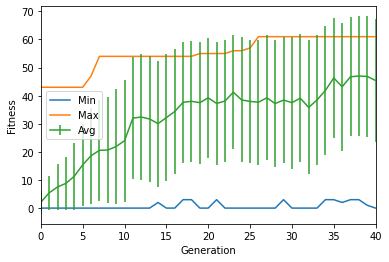

Best individual GP is if_food_ahead(if_food_ahead(move_forward, move_forward), prog2(prog3(prog2(if_food_ahead(move_forward, if_food_ahead(move_forward, prog2(if_food_ahead(move_forward, if_food_ahead(prog2(turn_left, prog2(turn_left, move_forward)), prog3(prog2(turn_left, move_forward), move_forward, move_forward))), move_forward))), move_forward), prog2(prog3(prog2(if_food_ahead(move_forward, prog3(prog2(turn_left, move_forward), move_forward, move_forward)), move_forward), move_forward, turn_right), move_forward), turn_right), move_forward)), (61.0,)


In [3]:
import sys
import time
import copy
import random

import numpy

from functools import partial

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import utils.utils_11.plot_utils as plot_utils
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GP_POP_SIZE = 300               # population size for GP
GP_NGEN = 40                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.9, 0.05   # crossover and mutation probability for GP
GP_TRNMT_SIZE = 7               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP
seed = 0
"""
-------------------------------------------------------------------------
"""

def progn(*args):
    for arg in args:
        arg()

def prog2(out1, out2): 
    return partial(progn,out1,out2)

def prog3(out1, out2, out3):     
    return partial(progn,out1,out2,out3)

def if_then_else(condition, out1, out2):
    out1() if condition() else out2()

class AntSimulator(object):
    direction = ["north","east","south","west"]
    dir_row = [1, 0, -1, 0]
    dir_col = [0, 1, 0, -1]
    
    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.eaten = 0
        self.routine = None
        
    def _reset(self):
        self.row = self.row_start 
        self.col = self.col_start 
        self.dir = 1
        self.moves = 0  
        self.eaten = 0
        self.matrix_exc = copy.deepcopy(self.matrix)

    @property
    def position(self):
        return (self.row, self.col, self.direction[self.dir])
            
    def turn_left(self): 
        if self.moves < self.max_moves:
            self.moves += 1
            self.dir = (self.dir - 1) % 4

    def turn_right(self):
        if self.moves < self.max_moves:
            self.moves += 1    
            self.dir = (self.dir + 1) % 4
        
    def move_forward(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.row = (self.row + self.dir_row[self.dir]) % self.matrix_row
            self.col = (self.col + self.dir_col[self.dir]) % self.matrix_col
            if self.matrix_exc[self.row][self.col] == "food":
                self.eaten += 1
            self.matrix_exc[self.row][self.col] = "passed"

    def sense_food(self):
        ahead_row = (self.row + self.dir_row[self.dir]) % self.matrix_row
        ahead_col = (self.col + self.dir_col[self.dir]) % self.matrix_col        
        return self.matrix_exc[ahead_row][ahead_col] == "food"
   
    def if_food_ahead(self, out1, out2):
        return partial(if_then_else, self.sense_food, out1, out2)
   
    def run(self,routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()
    
    def parse_matrix(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())
            for j, col in enumerate(line):
                if col == "#":
                    self.matrix[-1].append("food")
                elif col == ".":
                    self.matrix[-1].append("empty")
                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.dir = 1
        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)

ant = AntSimulator(600)

pset = gp.PrimitiveSet("MAIN", 0)
pset.addPrimitive(ant.if_food_ahead, 2)
pset.addPrimitive(prog2, 2)
pset.addPrimitive(prog3, 3)
pset.addTerminal(ant.move_forward)
pset.addTerminal(ant.turn_left)
pset.addTerminal(ant.turn_right)

try:
    del creator.FitnessMaxAnt
    del creator.IndividualAnt
except:
    pass
creator.create("FitnessMaxAnt", base.Fitness, weights=(1.0,))
creator.create("IndividualAnt", gp.PrimitiveTree, fitness=creator.FitnessMaxAnt)
    
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("expr_init", gp.genFull, pset=pset, min_=1, max_=2)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.IndividualAnt, toolbox.expr_init)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalArtificialAnt(individual):
    # Transform the tree expression to functionnal Python code
    routine = gp.compile(individual, pset)
    # Run the generated routine
    ant.run(routine)
    return ant.eaten,

toolbox.register("evaluate", evalArtificialAnt)
toolbox.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

#--------------------------------------------------------------------
seed = 238842
random.seed(seed)

with  open("utils/utils_11/data/santafe_trail.txt") as trail_file:
  ant.parse_matrix(trail_file)

pop = toolbox.population(n=GP_POP_SIZE)
hof = tools.HallOfFame(GP_HOF_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                      stats, halloffame=hof, verbose = False)

#--------------------------------------------------------------------

# plot GP tree
nodes, edges, labels = gp.graph(hof[0])
plot_utils.plotTree(nodes,edges,labels,'ant_'+str(seed),'results')

# plot fitness trends
plot_utils.plotTrends(logbook,'ant_'+str(seed),'results')

#--------------------------------------------------------------------

print("Best individual GP is %s, %s" % (hof[0], hof[0].fitness.values))

0
{0: 'prog3', 1: 'prog3', 2: 'turn_left', 3: 'move_forward', 4: 'move_forward', 5: 'prog3', 6: 'if_food_ahead', 7: 'move_forward', 8: 'move_forward', 9: 'turn_right', 10: 'if_food_ahead', 11: 'prog2', 12: 'prog3', 13: 'move_forward', 14: 'prog3', 15: 'turn_left', 16: 'move_forward', 17: 'move_forward', 18: 'move_forward', 19: 'move_forward', 20: 'move_forward', 21: 'if_food_ahead', 22: 'prog2', 23: 'prog3', 24: 'move_forward', 25: 'turn_right', 26: 'move_forward', 27: 'move_forward', 28: 'move_forward'}
prog3
1
{0: 'prog3', 1: 'prog3', 2: 'turn_left', 3: 'move_forward', 4: 'move_forward', 5: 'prog3', 6: 'if_food_ahead', 7: 'move_forward', 8: 'move_forward', 9: 'turn_right', 10: 'if_food_ahead', 11: 'prog2', 12: 'prog3', 13: 'move_forward', 14: 'prog3', 15: 'turn_left', 16: 'move_forward', 17: 'move_forward', 18: 'move_forward', 19: 'move_forward', 20: 'move_forward', 21: 'if_food_ahead', 22: 'prog2', 23: 'prog3', 24: 'move_forward', 25: 'turn_right', 26: 'move_forward', 27: 'move_forw

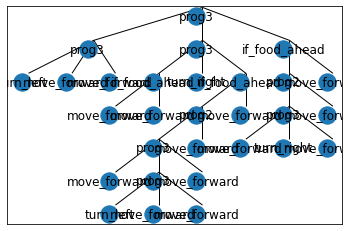

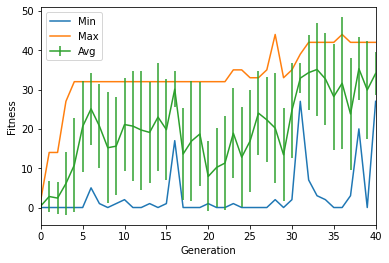

0
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'move_forward'}
if_food_ahead
1
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'move_forward'}
prog3
2
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'move_forward'}
move_forward
3
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'move_forward'}
turn_left
4
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'move_forward'}
move_forward
5
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'move_forward'}
move_forward


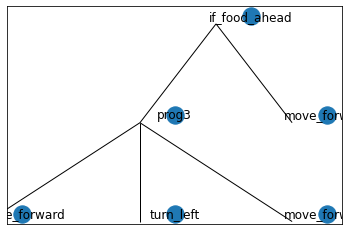

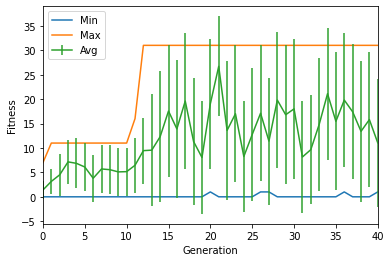

0
{0: 'prog3', 1: 'prog2', 2: 'prog2', 3: 'move_forward', 4: 'prog2', 5: 'prog2', 6: 'move_forward', 7: 'move_forward', 8: 'move_forward', 9: 'move_forward', 10: 'prog2', 11: 'prog2', 12: 'prog2', 13: 'prog2', 14: 'move_forward', 15: 'prog2', 16: 'prog2', 17: 'move_forward', 18: 'prog2', 19: 'prog2', 20: 'move_forward', 21: 'prog2', 22: 'prog2', 23: 'move_forward', 24: 'prog2', 25: 'prog2', 26: 'move_forward', 27: 'prog2', 28: 'prog2', 29: 'move_forward', 30: 'move_forward', 31: 'move_forward', 32: 'move_forward', 33: 'move_forward', 34: 'move_forward', 35: 'move_forward', 36: 'move_forward', 37: 'move_forward', 38: 'turn_right', 39: 'prog2', 40: 'prog2', 41: 'prog2', 42: 'move_forward', 43: 'prog2', 44: 'prog2', 45: 'move_forward', 46: 'prog2', 47: 'prog2', 48: 'move_forward', 49: 'move_forward', 50: 'move_forward', 51: 'move_forward', 52: 'move_forward', 53: 'prog2', 54: 'move_forward', 55: 'prog2', 56: 'prog2', 57: 'prog2', 58: 'move_forward', 59: 'move_forward', 60: 'move_forward',

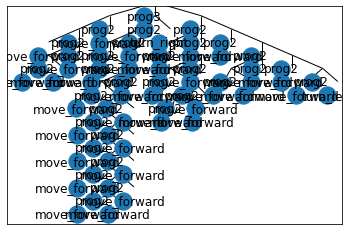

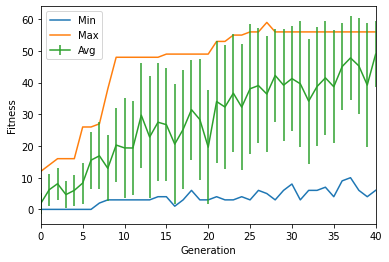

0
{0: 'prog3', 1: 'prog3', 2: 'if_food_ahead', 3: 'if_food_ahead', 4: 'move_forward', 5: 'move_forward', 6: 'turn_left', 7: 'move_forward', 8: 'move_forward', 9: 'if_food_ahead', 10: 'if_food_ahead', 11: 'if_food_ahead', 12: 'prog3', 13: 'if_food_ahead', 14: 'if_food_ahead', 15: 'if_food_ahead', 16: 'if_food_ahead', 17: 'prog3', 18: 'if_food_ahead', 19: 'if_food_ahead', 20: 'move_forward', 21: 'if_food_ahead', 22: 'move_forward', 23: 'if_food_ahead', 24: 'move_forward', 25: 'if_food_ahead', 26: 'if_food_ahead', 27: 'if_food_ahead', 28: 'if_food_ahead', 29: 'if_food_ahead', 30: 'if_food_ahead', 31: 'turn_right', 32: 'turn_right', 33: 'if_food_ahead', 34: 'move_forward', 35: 'turn_right', 36: 'if_food_ahead', 37: 'move_forward', 38: 'turn_left', 39: 'turn_left', 40: 'move_forward', 41: 'turn_right', 42: 'turn_left', 43: 'move_forward', 44: 'move_forward', 45: 'if_food_ahead', 46: 'move_forward', 47: 'turn_right', 48: 'if_food_ahead', 49: 'move_forward', 50: 'turn_left', 51: 'turn_right',

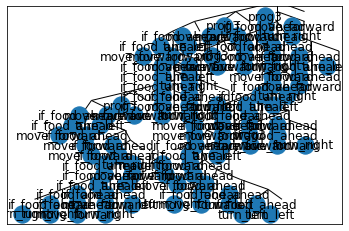

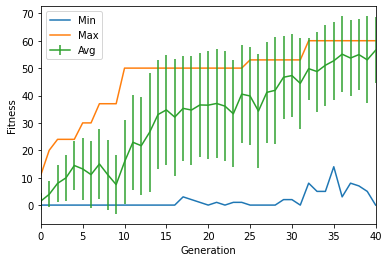

0
{0: 'if_food_ahead', 1: 'move_forward', 2: 'prog3', 3: 'turn_right', 4: 'move_forward', 5: 'prog3', 6: 'prog3', 7: 'turn_right', 8: 'prog3', 9: 'turn_right', 10: 'move_forward', 11: 'prog3', 12: 'move_forward', 13: 'move_forward', 14: 'prog3', 15: 'move_forward', 16: 'move_forward', 17: 'prog3', 18: 'move_forward', 19: 'move_forward', 20: 'turn_left', 21: 'prog3', 22: 'move_forward', 23: 'move_forward', 24: 'prog3', 25: 'move_forward', 26: 'move_forward', 27: 'turn_left', 28: 'move_forward', 29: 'turn_left'}
if_food_ahead
1
{0: 'if_food_ahead', 1: 'move_forward', 2: 'prog3', 3: 'turn_right', 4: 'move_forward', 5: 'prog3', 6: 'prog3', 7: 'turn_right', 8: 'prog3', 9: 'turn_right', 10: 'move_forward', 11: 'prog3', 12: 'move_forward', 13: 'move_forward', 14: 'prog3', 15: 'move_forward', 16: 'move_forward', 17: 'prog3', 18: 'move_forward', 19: 'move_forward', 20: 'turn_left', 21: 'prog3', 22: 'move_forward', 23: 'move_forward', 24: 'prog3', 25: 'move_forward', 26: 'move_forward', 27: 'tur

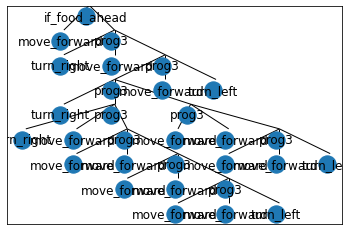

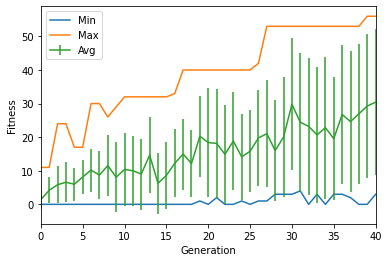

0
{0: 'prog3', 1: 'if_food_ahead', 2: 'if_food_ahead', 3: 'prog3', 4: 'move_forward', 5: 'turn_right', 6: 'prog3', 7: 'move_forward', 8: 'move_forward', 9: 'prog3', 10: 'move_forward', 11: 'if_food_ahead', 12: 'if_food_ahead', 13: 'prog3', 14: 'move_forward', 15: 'move_forward', 16: 'move_forward', 17: 'if_food_ahead', 18: 'prog3', 19: 'move_forward', 20: 'move_forward', 21: 'turn_left', 22: 'move_forward', 23: 'move_forward', 24: 'turn_left', 25: 'if_food_ahead', 26: 'prog3', 27: 'move_forward', 28: 'move_forward', 29: 'turn_right', 30: 'move_forward', 31: 'move_forward', 32: 'prog3', 33: 'move_forward', 34: 'move_forward', 35: 'prog3', 36: 'move_forward', 37: 'move_forward', 38: 'turn_left', 39: 'prog3', 40: 'move_forward', 41: 'move_forward', 42: 'turn_right'}
prog3
1
{0: 'prog3', 1: 'if_food_ahead', 2: 'if_food_ahead', 3: 'prog3', 4: 'move_forward', 5: 'turn_right', 6: 'prog3', 7: 'move_forward', 8: 'move_forward', 9: 'prog3', 10: 'move_forward', 11: 'if_food_ahead', 12: 'if_food_a

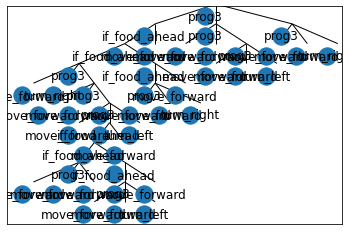

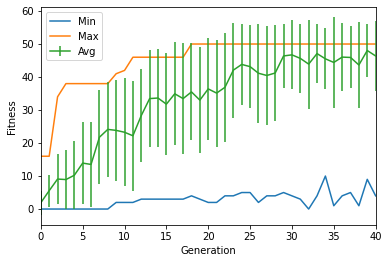

0
{0: 'prog2', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_right', 4: 'if_food_ahead', 5: 'move_forward', 6: 'prog2', 7: 'prog3', 8: 'prog3', 9: 'turn_right', 10: 'move_forward', 11: 'turn_left', 12: 'move_forward', 13: 'move_forward', 14: 'if_food_ahead', 15: 'move_forward', 16: 'turn_left'}
prog2
1
{0: 'prog2', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_right', 4: 'if_food_ahead', 5: 'move_forward', 6: 'prog2', 7: 'prog3', 8: 'prog3', 9: 'turn_right', 10: 'move_forward', 11: 'turn_left', 12: 'move_forward', 13: 'move_forward', 14: 'if_food_ahead', 15: 'move_forward', 16: 'turn_left'}
if_food_ahead
2
{0: 'prog2', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_right', 4: 'if_food_ahead', 5: 'move_forward', 6: 'prog2', 7: 'prog3', 8: 'prog3', 9: 'turn_right', 10: 'move_forward', 11: 'turn_left', 12: 'move_forward', 13: 'move_forward', 14: 'if_food_ahead', 15: 'move_forward', 16: 'turn_left'}
move_forward
3
{0: 'prog2', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_right', 4:

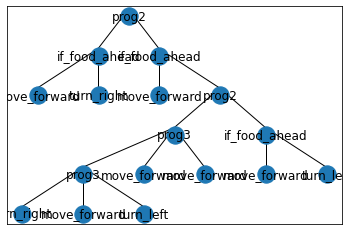

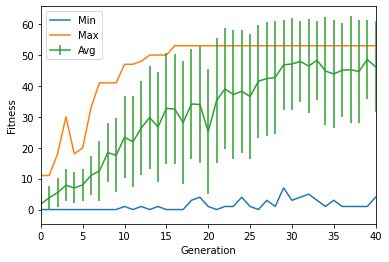

0
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'if_food_ahead', 6: 'turn_left', 7: 'move_forward'}
if_food_ahead
1
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'if_food_ahead', 6: 'turn_left', 7: 'move_forward'}
prog3
2
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'if_food_ahead', 6: 'turn_left', 7: 'move_forward'}
move_forward
3
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'if_food_ahead', 6: 'turn_left', 7: 'move_forward'}
turn_left
4
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'if_food_ahead', 6: 'turn_left', 7: 'move_forward'}
move_forward
5
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_left', 4: 'move_forward', 5: 'if_food_ahead', 6: 'turn_left', 7: 'move_forward'}
if_food_ahead
6
{0: 'if_food_ahead', 1: 'prog3', 2: 'move_forward', 3: 'turn_lef

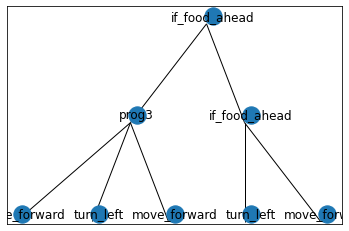

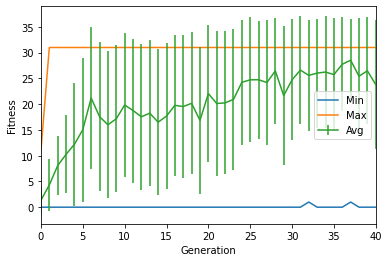

0
{0: 'prog3', 1: 'prog3', 2: 'move_forward', 3: 'move_forward', 4: 'if_food_ahead', 5: 'turn_left', 6: 'move_forward', 7: 'prog3', 8: 'turn_right', 9: 'prog2', 10: 'move_forward', 11: 'move_forward', 12: 'if_food_ahead', 13: 'prog3', 14: 'move_forward', 15: 'move_forward', 16: 'if_food_ahead', 17: 'turn_left', 18: 'move_forward', 19: 'prog2', 20: 'turn_right', 21: 'turn_right', 22: 'turn_right'}
prog3
1
{0: 'prog3', 1: 'prog3', 2: 'move_forward', 3: 'move_forward', 4: 'if_food_ahead', 5: 'turn_left', 6: 'move_forward', 7: 'prog3', 8: 'turn_right', 9: 'prog2', 10: 'move_forward', 11: 'move_forward', 12: 'if_food_ahead', 13: 'prog3', 14: 'move_forward', 15: 'move_forward', 16: 'if_food_ahead', 17: 'turn_left', 18: 'move_forward', 19: 'prog2', 20: 'turn_right', 21: 'turn_right', 22: 'turn_right'}
prog3
2
{0: 'prog3', 1: 'prog3', 2: 'move_forward', 3: 'move_forward', 4: 'if_food_ahead', 5: 'turn_left', 6: 'move_forward', 7: 'prog3', 8: 'turn_right', 9: 'prog2', 10: 'move_forward', 11: 'mo

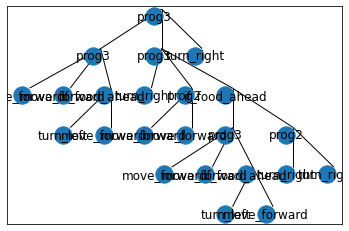

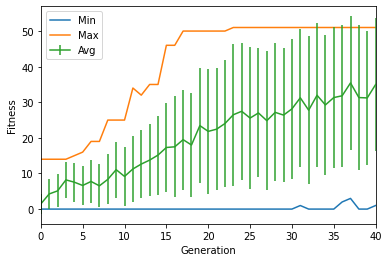

0
{0: 'prog3', 1: 'prog3', 2: 'move_forward', 3: 'move_forward', 4: 'prog2', 5: 'prog3', 6: 'move_forward', 7: 'move_forward', 8: 'move_forward', 9: 'move_forward', 10: 'prog3', 11: 'turn_left', 12: 'move_forward', 13: 'turn_right', 14: 'if_food_ahead', 15: 'prog3', 16: 'move_forward', 17: 'prog3', 18: 'move_forward', 19: 'move_forward', 20: 'move_forward', 21: 'move_forward', 22: 'move_forward'}
prog3
1
{0: 'prog3', 1: 'prog3', 2: 'move_forward', 3: 'move_forward', 4: 'prog2', 5: 'prog3', 6: 'move_forward', 7: 'move_forward', 8: 'move_forward', 9: 'move_forward', 10: 'prog3', 11: 'turn_left', 12: 'move_forward', 13: 'turn_right', 14: 'if_food_ahead', 15: 'prog3', 16: 'move_forward', 17: 'prog3', 18: 'move_forward', 19: 'move_forward', 20: 'move_forward', 21: 'move_forward', 22: 'move_forward'}
prog3
2
{0: 'prog3', 1: 'prog3', 2: 'move_forward', 3: 'move_forward', 4: 'prog2', 5: 'prog3', 6: 'move_forward', 7: 'move_forward', 8: 'move_forward', 9: 'move_forward', 10: 'prog3', 11: 'turn_

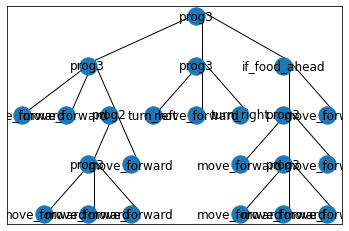

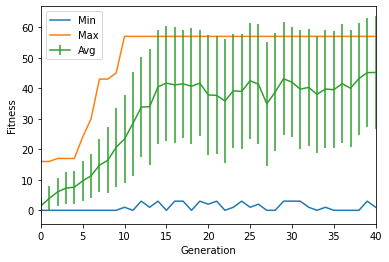

0
{0: 'if_food_ahead', 1: 'prog2', 2: 'if_food_ahead', 3: 'move_forward', 4: 'turn_right', 5: 'turn_right', 6: 'prog3', 7: 'turn_left', 8: 'if_food_ahead', 9: 'if_food_ahead', 10: 'move_forward', 11: 'move_forward', 12: 'if_food_ahead', 13: 'move_forward', 14: 'prog2', 15: 'move_forward', 16: 'move_forward', 17: 'if_food_ahead', 18: 'move_forward', 19: 'prog2', 20: 'if_food_ahead', 21: 'if_food_ahead', 22: 'if_food_ahead', 23: 'move_forward', 24: 'if_food_ahead', 25: 'move_forward', 26: 'prog2', 27: 'if_food_ahead', 28: 'prog2', 29: 'if_food_ahead', 30: 'turn_right', 31: 'turn_right', 32: 'prog3', 33: 'turn_left', 34: 'move_forward', 35: 'move_forward', 36: 'if_food_ahead', 37: 'if_food_ahead', 38: 'turn_right', 39: 'prog2', 40: 'if_food_ahead', 41: 'move_forward', 42: 'prog2', 43: 'if_food_ahead', 44: 'if_food_ahead', 45: 'if_food_ahead', 46: 'move_forward', 47: 'turn_right', 48: 'move_forward', 49: 'prog3', 50: 'turn_left', 51: 'if_food_ahead', 52: 'move_forward', 53: 'move_forward',

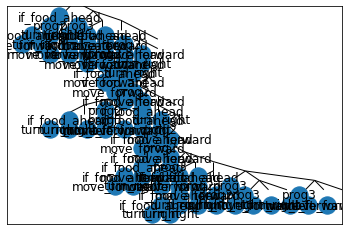

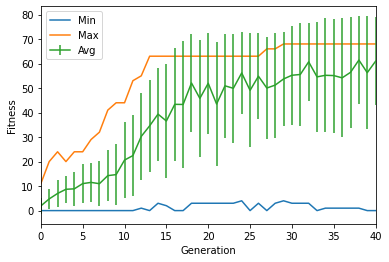

0
{0: 'prog3', 1: 'prog3', 2: 'turn_right', 3: 'if_food_ahead', 4: 'turn_left', 5: 'turn_right', 6: 'turn_right', 7: 'if_food_ahead', 8: 'move_forward', 9: 'turn_right', 10: 'if_food_ahead', 11: 'move_forward', 12: 'move_forward'}
prog3
1
{0: 'prog3', 1: 'prog3', 2: 'turn_right', 3: 'if_food_ahead', 4: 'turn_left', 5: 'turn_right', 6: 'turn_right', 7: 'if_food_ahead', 8: 'move_forward', 9: 'turn_right', 10: 'if_food_ahead', 11: 'move_forward', 12: 'move_forward'}
prog3
2
{0: 'prog3', 1: 'prog3', 2: 'turn_right', 3: 'if_food_ahead', 4: 'turn_left', 5: 'turn_right', 6: 'turn_right', 7: 'if_food_ahead', 8: 'move_forward', 9: 'turn_right', 10: 'if_food_ahead', 11: 'move_forward', 12: 'move_forward'}
turn_right
3
{0: 'prog3', 1: 'prog3', 2: 'turn_right', 3: 'if_food_ahead', 4: 'turn_left', 5: 'turn_right', 6: 'turn_right', 7: 'if_food_ahead', 8: 'move_forward', 9: 'turn_right', 10: 'if_food_ahead', 11: 'move_forward', 12: 'move_forward'}
if_food_ahead
4
{0: 'prog3', 1: 'prog3', 2: 'turn_rig

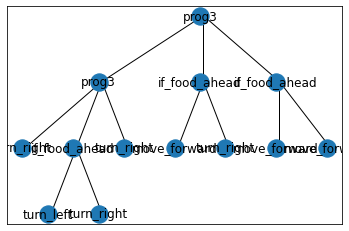

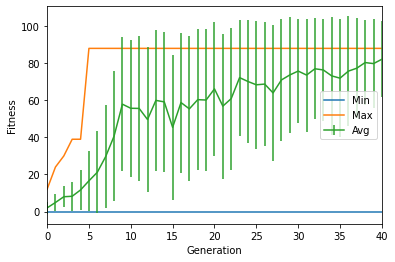

0
{0: 'prog3', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_left', 4: 'prog2', 5: 'move_forward', 6: 'prog2', 7: 'if_food_ahead', 8: 'prog2', 9: 'prog2', 10: 'if_food_ahead', 11: 'if_food_ahead', 12: 'move_forward', 13: 'turn_left', 14: 'turn_left', 15: 'prog2', 16: 'turn_left', 17: 'if_food_ahead', 18: 'turn_right', 19: 'turn_left', 20: 'turn_right', 21: 'turn_left', 22: 'if_food_ahead', 23: 'turn_right', 24: 'if_food_ahead', 25: 'turn_right', 26: 'turn_left', 27: 'turn_left'}
prog3
1
{0: 'prog3', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_left', 4: 'prog2', 5: 'move_forward', 6: 'prog2', 7: 'if_food_ahead', 8: 'prog2', 9: 'prog2', 10: 'if_food_ahead', 11: 'if_food_ahead', 12: 'move_forward', 13: 'turn_left', 14: 'turn_left', 15: 'prog2', 16: 'turn_left', 17: 'if_food_ahead', 18: 'turn_right', 19: 'turn_left', 20: 'turn_right', 21: 'turn_left', 22: 'if_food_ahead', 23: 'turn_right', 24: 'if_food_ahead', 25: 'turn_right', 26: 'turn_left', 27: 'turn_left'}
if_food_ahead
2
{0: 'p

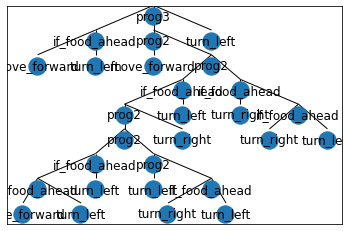

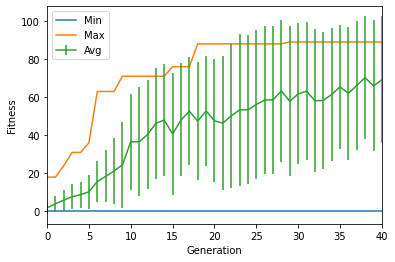

0
{0: 'prog2', 1: 'prog3', 2: 'move_forward', 3: 'if_food_ahead', 4: 'if_food_ahead', 5: 'prog3', 6: 'move_forward', 7: 'if_food_ahead', 8: 'prog3', 9: 'move_forward', 10: 'turn_left', 11: 'if_food_ahead', 12: 'prog3', 13: 'if_food_ahead', 14: 'move_forward', 15: 'move_forward', 16: 'prog3', 17: 'move_forward', 18: 'if_food_ahead', 19: 'prog3', 20: 'if_food_ahead', 21: 'move_forward', 22: 'move_forward', 23: 'move_forward', 24: 'move_forward', 25: 'turn_right', 26: 'if_food_ahead', 27: 'move_forward', 28: 'move_forward', 29: 'move_forward', 30: 'turn_right', 31: 'turn_right', 32: 'move_forward', 33: 'if_food_ahead', 34: 'move_forward', 35: 'turn_right', 36: 'if_food_ahead', 37: 'prog3', 38: 'turn_left', 39: 'if_food_ahead', 40: 'move_forward', 41: 'if_food_ahead', 42: 'if_food_ahead', 43: 'move_forward', 44: 'if_food_ahead', 45: 'prog3', 46: 'move_forward', 47: 'turn_right', 48: 'turn_right', 49: 'if_food_ahead', 50: 'turn_left', 51: 'prog3', 52: 'move_forward', 53: 'if_food_ahead', 54

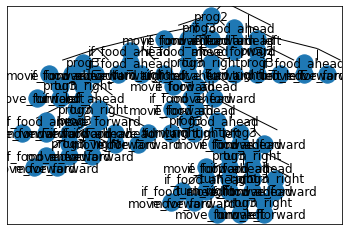

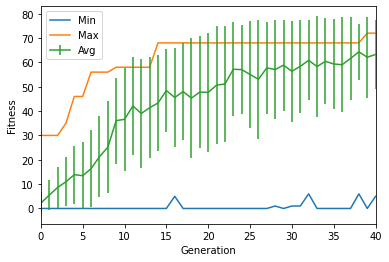

0
{0: 'prog3', 1: 'prog2', 2: 'if_food_ahead', 3: 'move_forward', 4: 'turn_right', 5: 'if_food_ahead', 6: 'move_forward', 7: 'move_forward', 8: 'move_forward', 9: 'if_food_ahead', 10: 'move_forward', 11: 'turn_left'}
prog3
1
{0: 'prog3', 1: 'prog2', 2: 'if_food_ahead', 3: 'move_forward', 4: 'turn_right', 5: 'if_food_ahead', 6: 'move_forward', 7: 'move_forward', 8: 'move_forward', 9: 'if_food_ahead', 10: 'move_forward', 11: 'turn_left'}
prog2
2
{0: 'prog3', 1: 'prog2', 2: 'if_food_ahead', 3: 'move_forward', 4: 'turn_right', 5: 'if_food_ahead', 6: 'move_forward', 7: 'move_forward', 8: 'move_forward', 9: 'if_food_ahead', 10: 'move_forward', 11: 'turn_left'}
if_food_ahead
3
{0: 'prog3', 1: 'prog2', 2: 'if_food_ahead', 3: 'move_forward', 4: 'turn_right', 5: 'if_food_ahead', 6: 'move_forward', 7: 'move_forward', 8: 'move_forward', 9: 'if_food_ahead', 10: 'move_forward', 11: 'turn_left'}
move_forward
4
{0: 'prog3', 1: 'prog2', 2: 'if_food_ahead', 3: 'move_forward', 4: 'turn_right', 5: 'if_foo

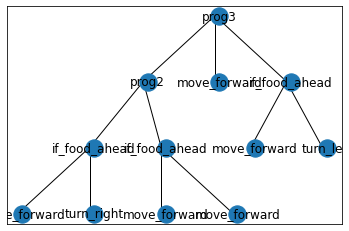

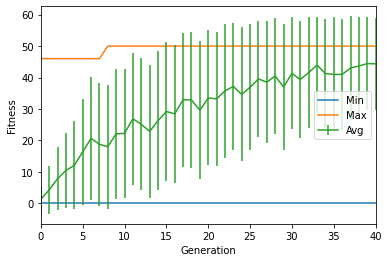

In [5]:
best_fitnesses = []
lens = []

with  open("utils/utils_11/data/santafe_trail.txt") as trail_file:
  ant.parse_matrix(trail_file)


for pop_size in range(10,160,10):
    
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(GP_HOF_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, GP_NGEN, \
                                          stats, halloffame=hof, verbose = False)
    
    # plot GP tree
    nodes, edges, labels = gp.graph(hof[0])
    plot_utils.plotTree(nodes,edges,labels,'ant_'+str(seed),'results')

    # plot fitness trends
    plot_utils.plotTrends(logbook,'ant_'+str(seed),'results')
    
    best_fitnesses.append(hof[0].fitness.values)
    lens.append(len(hof[0]))


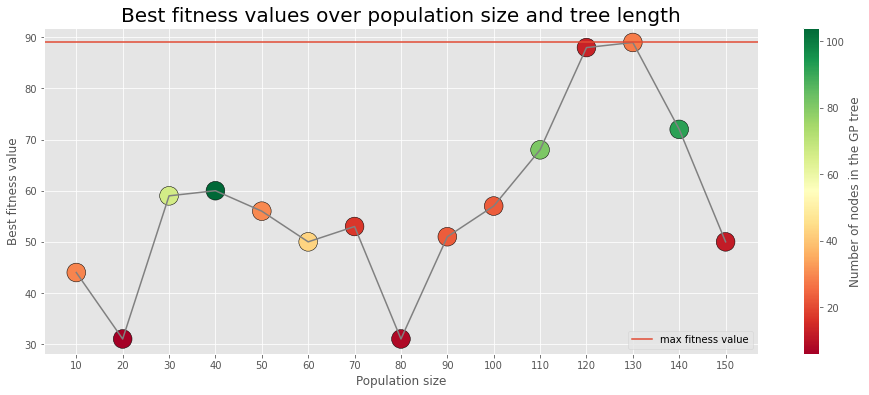

In [11]:
x = [i for i in range(10,160,10)]
plt.figure(figsize=(16,6))
plt.scatter(x,best_fitnesses, s = 350, c=lens, cmap='RdYlGn', edgecolor = "black")
plt.plot(x,best_fitnesses, color = "grey")
plt.xticks(range(10, 160, 10))
plt.colorbar(label='Number of nodes in the GP tree')
plt.xlabel("Population size")
plt.ylabel("Best fitness value")
plt.axhline(y = 89, label = "max fitness value")
plt.legend(loc="best")
plt.title("Best fitness values over population size and tree length", fontsize = 20)
plt.show()

0
{0: 'prog3', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_right', 4: 'move_forward', 5: 'prog3', 6: 'prog3', 7: 'turn_left', 8: 'if_food_ahead', 9: 'prog2', 10: 'move_forward', 11: 'move_forward', 12: 'move_forward', 13: 'move_forward', 14: 'move_forward', 15: 'move_forward'}
prog3
1
{0: 'prog3', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_right', 4: 'move_forward', 5: 'prog3', 6: 'prog3', 7: 'turn_left', 8: 'if_food_ahead', 9: 'prog2', 10: 'move_forward', 11: 'move_forward', 12: 'move_forward', 13: 'move_forward', 14: 'move_forward', 15: 'move_forward'}
if_food_ahead
2
{0: 'prog3', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_right', 4: 'move_forward', 5: 'prog3', 6: 'prog3', 7: 'turn_left', 8: 'if_food_ahead', 9: 'prog2', 10: 'move_forward', 11: 'move_forward', 12: 'move_forward', 13: 'move_forward', 14: 'move_forward', 15: 'move_forward'}
move_forward
3
{0: 'prog3', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_right', 4: 'move_forward', 5: 'prog3', 6: 'prog3', 7: 'tur

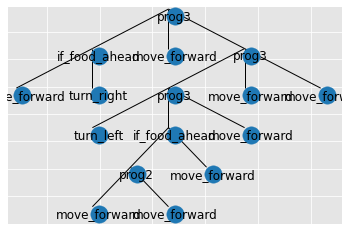

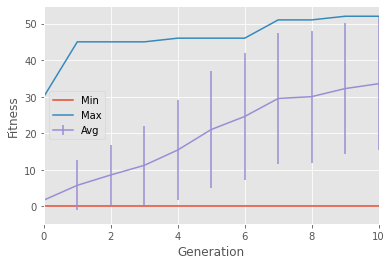

0
{0: 'prog2', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_right', 4: 'prog2', 5: 'if_food_ahead', 6: 'move_forward', 7: 'move_forward', 8: 'prog2', 9: 'if_food_ahead', 10: 'move_forward', 11: 'move_forward', 12: 'if_food_ahead', 13: 'move_forward', 14: 'prog2', 15: 'if_food_ahead', 16: 'move_forward', 17: 'if_food_ahead', 18: 'if_food_ahead', 19: 'if_food_ahead', 20: 'if_food_ahead', 21: 'move_forward', 22: 'turn_left', 23: 'turn_left', 24: 'move_forward', 25: 'move_forward', 26: 'if_food_ahead', 27: 'move_forward', 28: 'turn_left'}
prog2
1
{0: 'prog2', 1: 'if_food_ahead', 2: 'move_forward', 3: 'turn_right', 4: 'prog2', 5: 'if_food_ahead', 6: 'move_forward', 7: 'move_forward', 8: 'prog2', 9: 'if_food_ahead', 10: 'move_forward', 11: 'move_forward', 12: 'if_food_ahead', 13: 'move_forward', 14: 'prog2', 15: 'if_food_ahead', 16: 'move_forward', 17: 'if_food_ahead', 18: 'if_food_ahead', 19: 'if_food_ahead', 20: 'if_food_ahead', 21: 'move_forward', 22: 'turn_left', 23: 'turn_left', 24: 

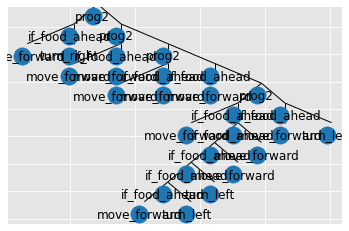

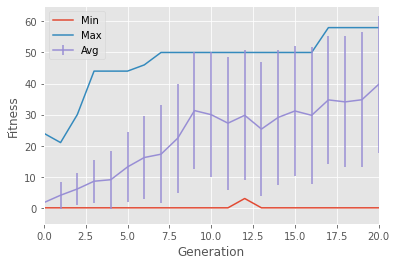

0
{0: 'if_food_ahead', 1: 'move_forward', 2: 'if_food_ahead', 3: 'prog3', 4: 'move_forward', 5: 'move_forward', 6: 'turn_left', 7: 'prog2', 8: 'prog2', 9: 'prog3', 10: 'turn_left', 11: 'move_forward', 12: 'if_food_ahead', 13: 'move_forward', 14: 'turn_right', 15: 'move_forward', 16: 'if_food_ahead', 17: 'prog3', 18: 'move_forward', 19: 'move_forward', 20: 'turn_right', 21: 'prog2', 22: 'if_food_ahead', 23: 'prog3', 24: 'move_forward', 25: 'move_forward', 26: 'turn_right', 27: 'prog2', 28: 'prog3', 29: 'turn_left', 30: 'move_forward', 31: 'if_food_ahead', 32: 'move_forward', 33: 'turn_right', 34: 'move_forward', 35: 'move_forward'}
if_food_ahead
1
{0: 'if_food_ahead', 1: 'move_forward', 2: 'if_food_ahead', 3: 'prog3', 4: 'move_forward', 5: 'move_forward', 6: 'turn_left', 7: 'prog2', 8: 'prog2', 9: 'prog3', 10: 'turn_left', 11: 'move_forward', 12: 'if_food_ahead', 13: 'move_forward', 14: 'turn_right', 15: 'move_forward', 16: 'if_food_ahead', 17: 'prog3', 18: 'move_forward', 19: 'move_for

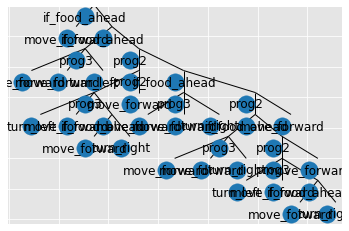

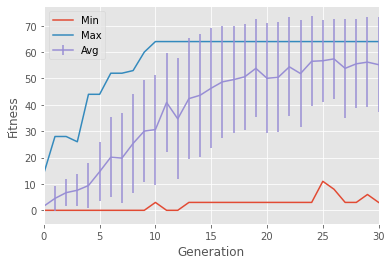

0
{0: 'prog3', 1: 'if_food_ahead', 2: 'move_forward', 3: 'move_forward', 4: 'if_food_ahead', 5: 'prog3', 6: 'move_forward', 7: 'if_food_ahead', 8: 'prog3', 9: 'if_food_ahead', 10: 'move_forward', 11: 'turn_left', 12: 'prog3', 13: 'if_food_ahead', 14: 'move_forward', 15: 'move_forward', 16: 'move_forward', 17: 'if_food_ahead', 18: 'move_forward', 19: 'prog3', 20: 'move_forward', 21: 'if_food_ahead', 22: 'prog3', 23: 'if_food_ahead', 24: 'move_forward', 25: 'move_forward', 26: 'turn_left', 27: 'move_forward', 28: 'if_food_ahead', 29: 'move_forward', 30: 'turn_left', 31: 'move_forward', 32: 'move_forward', 33: 'if_food_ahead', 34: 'prog3', 35: 'move_forward', 36: 'if_food_ahead', 37: 'prog3', 38: 'move_forward', 39: 'if_food_ahead', 40: 'prog3', 41: 'turn_left', 42: 'if_food_ahead', 43: 'prog3', 44: 'if_food_ahead', 45: 'if_food_ahead', 46: 'move_forward', 47: 'move_forward', 48: 'move_forward', 49: 'turn_left', 50: 'move_forward', 51: 'turn_left', 52: 'move_forward', 53: 'turn_left', 54:

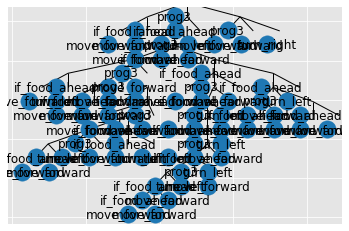

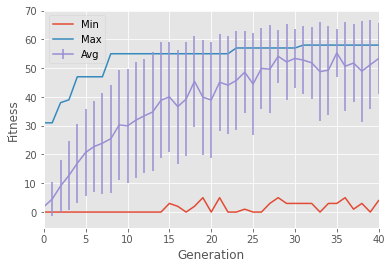

0
{0: 'if_food_ahead', 1: 'move_forward', 2: 'prog3', 3: 'prog3', 4: 'turn_left', 5: 'move_forward', 6: 'prog3', 7: 'move_forward', 8: 'move_forward', 9: 'move_forward', 10: 'move_forward', 11: 'prog3', 12: 'if_food_ahead', 13: 'prog3', 14: 'move_forward', 15: 'move_forward', 16: 'turn_right', 17: 'if_food_ahead', 18: 'move_forward', 19: 'move_forward', 20: 'turn_right', 21: 'move_forward'}
if_food_ahead
1
{0: 'if_food_ahead', 1: 'move_forward', 2: 'prog3', 3: 'prog3', 4: 'turn_left', 5: 'move_forward', 6: 'prog3', 7: 'move_forward', 8: 'move_forward', 9: 'move_forward', 10: 'move_forward', 11: 'prog3', 12: 'if_food_ahead', 13: 'prog3', 14: 'move_forward', 15: 'move_forward', 16: 'turn_right', 17: 'if_food_ahead', 18: 'move_forward', 19: 'move_forward', 20: 'turn_right', 21: 'move_forward'}
move_forward
2
{0: 'if_food_ahead', 1: 'move_forward', 2: 'prog3', 3: 'prog3', 4: 'turn_left', 5: 'move_forward', 6: 'prog3', 7: 'move_forward', 8: 'move_forward', 9: 'move_forward', 10: 'move_forwa

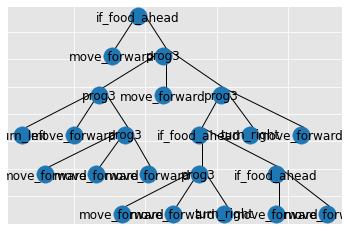

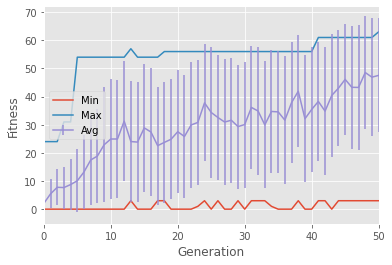

In [24]:
best_fitnesses = []
lens = []
POP_SIZE = 130
with  open("utils/utils_11/data/santafe_trail.txt") as trail_file:
  ant.parse_matrix(trail_file)


for gen in range(10,60,10):
    
    pop = toolbox.population(n=POP_SIZE )
    hof = tools.HallOfFame(GP_HOF_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    final_pop,logbook=algorithms.eaSimple(pop, toolbox, GP_CXPB, GP_MUTPB, gen, \
                                          stats, halloffame=hof, verbose = False)
    
    # plot GP tree
    nodes, edges, labels = gp.graph(hof[0])
    plot_utils.plotTree(nodes,edges,labels,'ant_'+str(seed),'results')

    # plot fitness trends
    plot_utils.plotTrends(logbook,'ant_'+str(seed),'results')
    
    best_fitnesses.append(hof[0].fitness.values)
    lens.append(len(hof[0]))


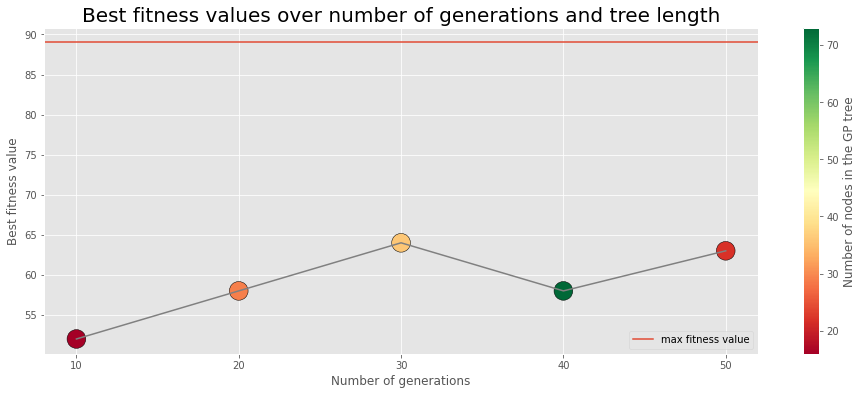

In [26]:
x = [i for i in range(10,60,10)]
plt.figure(figsize=(16,6))
plt.scatter(x,best_fitnesses, s = 350, c=lens, cmap='RdYlGn', edgecolor = "black")
plt.plot(x,best_fitnesses, color = "grey")
plt.xticks(range(10, 60, 10))
plt.colorbar(label='Number of nodes in the GP tree')
plt.xlabel("Number of generations")
plt.ylabel("Best fitness value")
plt.axhline(y = 89, label = "max fitness value")
plt.legend(loc="best")
plt.title("Best fitness values over number of generations and tree length", fontsize = 20)
plt.show()

# Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 

 - **What are the main strengths and limitations of GP, in your opinion?**
1. Automatic Solution Generation: GP has the ability to automatically generate solutions without requiring prior knowledge or explicit programming. It can explore a large search space and discover complex solutions that may be difficult to formulate manually.

2. Adaptability and Flexibility: GP is a flexible approach that can handle a wide range of problem types and domains. It can evolve solutions for various tasks such as classification, regression, optimization, control, and more.

3. Exploration of Solution Space: GP's evolutionary nature allows it to explore diverse solutions by combining and evolving different components. This ability enables GP to potentially find novel and creative solutions to complex problems.

4. Handling Complex and Nonlinear Problems: GP is suitable for tackling problems with complex relationships and nonlinear dynamics. It can capture intricate interactions between variables and evolve solutions that incorporate such complexities.

5. Interpretable Solutions: GP can produce human-readable solutions in the form of symbolic expressions or decision trees. This interpretability allows for a deeper understanding of the evolved solutions and facilitates their analysis.

Limitations of Genetic Programming (GP):

1. Computational Complexity: GP can be computationally expensive, especially when dealing with large populations and complex problems. The evaluation and evolution of large trees can require significant computational resources and time.

2. Premature Convergence and Local Optima: Like other evolutionary algorithms, GP is susceptible to premature convergence, where the search process gets trapped in suboptimal solutions or fails to explore the full solution space. Effective diversity preservation mechanisms and appropriate parameter settings are needed to mitigate this limitation.

3. Designing and Tuning Operators: The performance of GP heavily relies on the design and tuning of genetic operators such as crossover and mutation. Developing effective operators for a specific problem requires domain expertise and experimentation to achieve good results.

4. Scalability and Generalization: GP may face challenges in scaling up to larger problem sizes and maintaining generalization ability. The evolved solutions can be sensitive to the problem's representation, training set, and evaluation criteria, limiting their ability to generalize to unseen data or new problem instances.

5. Implicit Bias and Overfitting: GP can exhibit an implicit bias towards certain types of solutions based on the representation and fitness evaluation. Without careful consideration, this bias may lead to overfitting, where the evolved solutions perform well on the training data but fail to generalize to unseen data.

Understanding these strengths and limitations can help in the informed application of GP and guide the selection of appropriate techniques and strategies to address specific challenges.
 - **In which kind of applications do you think that GP could be more useful than other kinds of black-box Machine Learning techniques, such as Neural Network? Why?**
 Genetic Programming (GP) can be particularly useful in certain types of applications where its strengths align with the problem requirements and characteristics. Here are a few scenarios where GP may have advantages over other black-box machine learning techniques, such as neural networks:

1. Symbolic Regression: GP is well-suited for symbolic regression tasks, where the goal is to discover mathematical expressions or symbolic models that accurately represent the underlying relationships in the data. GP's ability to evolve and combine mathematical expressions in symbolic form makes it a natural fit for these types of problems.

2. Feature Engineering: In cases where feature engineering plays a critical role, GP can be beneficial. By evolving programs or expressions that incorporate domain-specific knowledge or incorporate problem-specific features, GP can automate the process of creating effective features, potentially improving model performance.

3. Interpretable Models: When interpretability is a priority, GP's ability to generate human-readable solutions in the form of symbolic expressions or decision trees can be advantageous. The evolved models can provide insights and explanations about how the system makes decisions, which can be crucial in domains where interpretability and explainability are essential, such as medicine, finance, or law.

4. Exploration of Solution Space: GP's nature as an evolutionary algorithm allows it to explore a wide range of possible solutions by combining and evolving different components. This exploration capability makes GP suitable for problems that require creative, innovative, or unconventional solutions. It can potentially discover novel approaches or uncover non-intuitive relationships.

5. Incorporating Domain Knowledge: If prior domain knowledge or constraints are available, GP can incorporate this information explicitly into the search process. By encoding domain-specific rules or constraints, GP can guide the evolution towards more desirable solutions, leveraging the expertise of human domain experts. 

# BONUS
In the enxt cell there is a variant of the first exercise. The main difference between this and the original exercise is that in this variant a _competitive co-evolutionary approach_ is used for solving the symbolic regression problem. Rather than determining _a priori_ the samples that are used for evolving the GP trees, **this approach uses a Genetic Algorithm (GA) to _evolve_ a fix-sized set of samples that is fed to a tree evolved by GP. The goal of GP is to _minimize_ the MSE, while the goal of GA is to _maximize_ it, i.e. to generate a set of samples that produces the largest fitting error in the evolving GP trees.** 

To do so, at the initial generation a random GA (GP) individual is sampled from the corresponding initial population and tested against all individuals in the initial population of GP (GA). Then at each subsequent generation **the best GA individual (i.e., the set of samples that produced the largest MSE so far)** is fed to all the trees in the current GP population. Vice versa, **the best GP tree (i.e., the one that showed the lowest MSE so far)** is fed with all the individuals (i.e., sets of samples) in the current GA population. **This form of _arms race_ forces the GP trees to become more adaptive, avoiding overfitting to a particular set of samples, thus also becoming better at generalizing and extrapolating data outside the specific set of samples that was used for fitting. Note, however, that in some cases this approach may lead to excessively large trees that are even impossible to evaluate$^{[1]}$. Indeed, due to an implicit limitation of Python, trees deeper than 90 layers cannot be evaluated. In these cases the script gives the following error:
`MemoryError: DEAP : Error in tree evaluation : Python cannot evaluate a tree higher than 90. To avoid this problem, you should use bloat control on your operators. See the DEAP documentation for more information. DEAP will now abort`.

Run some tests with the co-evolutionary variant of the symbolic regression experiment. At the end of the evolutionary process, you should see a separate fitness trend for the GA and the GP evolution. 

 - **Is this approach better (in terms of time to converge, approximation results, and robustness across multiple runs) than the one based on GP alone? Why?**
 - **Try to change the parameters of the co-evolutionary scheme to test how the system behaves under different configurations. Focus in particular on the population size used in the two algorithms (`GA_POP_SIZE` and `GP_POP_SIZE`), and the number of samples contained in each GA individual (`GA_REP_IND`).**



---
[1]: This is the typical effect of _bloat_. In the most extreme cases, this could even cause an internal Python `MemoryError`


EphemeralConstant is already defined, if you changed it restart the kernel
gen	type	evals	std     	min     	avg    	max    
0  	ga  	200  	0.371224	0.258922	1.15416	2.16899
0  	gp  	200  	4643.58 	0.369228	468.314	47527.8
1  	ga  	200  	0.366418	0.613953	1.49182 	2.62511
1  	gp  	200  	2.77181 	0.342382	0.853608	39.5826
2  	ga  	200  	0.106147	0.237043	0.497758	0.795163
2  	gp  	200  	15.549  	0.349903	1.87269 	221.147 
3  	ga  	200  	0.258313	0.034795	0.75102 	1.48807 
3  	gp  	200  	3.64827 	0.384653	1.27099 	51.3571 
4  	ga  	200  	0.404045	0.158052	1.27613 	2.41077 
4  	gp  	200  	2.00896 	0.550899	0.988232	22.8412 
5  	ga  	200  	0.107751	0.311968	0.572293	0.796023
5  	gp  	200  	0.572285	0.567969	0.771683	8.25814 
6  	ga  	200  	0.158326	0.270725	0.663638	1.21238 
6  	gp  	200  	0.396288	0.644969	0.857361	5.48308 
7  	ga  	200  	0.123244	0.526044	0.79002 	1.21235 
7  	gp  	200  	0.612618	0.379847	0.925658	4.09182 
8  	ga  	200  	0.154782	0.206013	0.678845	1.01101 
8  	gp  	200  	

78 	ga  	200  	0.00137751 	0.930176 	0.945885	0.94673 
78 	gp  	200  	0.136957   	0.94673  	0.968648	2.65942 
79 	ga  	200  	0.000516526	0.942663 	0.946156	0.946784
79 	gp  	200  	0.176429   	0.852576 	0.976697	2.86627 
0
{0: 'sub', 1: 'x', 2: 'sin', 3: 'sin', 4: 'add', 5: 'add', 6: 'x', 7: 'x', 8: 'cos', 9: 'x'}
sub
1
{0: 'sub', 1: 'x', 2: 'sin', 3: 'sin', 4: 'add', 5: 'add', 6: 'x', 7: 'x', 8: 'cos', 9: 'x'}
x
2
{0: 'sub', 1: 'x', 2: 'sin', 3: 'sin', 4: 'add', 5: 'add', 6: 'x', 7: 'x', 8: 'cos', 9: 'x'}
sin
3
{0: 'sub', 1: 'x', 2: 'sin', 3: 'sin', 4: 'add', 5: 'add', 6: 'x', 7: 'x', 8: 'cos', 9: 'x'}
sin
4
{0: 'sub', 1: 'x', 2: 'sin', 3: 'sin', 4: 'add', 5: 'add', 6: 'x', 7: 'x', 8: 'cos', 9: 'x'}
add
5
{0: 'sub', 1: 'x', 2: 'sin', 3: 'sin', 4: 'add', 5: 'add', 6: 'x', 7: 'x', 8: 'cos', 9: 'x'}
add
6
{0: 'sub', 1: 'x', 2: 'sin', 3: 'sin', 4: 'add', 5: 'add', 6: 'x', 7: 'x', 8: 'cos', 9: 'x'}
x
7
{0: 'sub', 1: 'x', 2: 'sin', 3: 'sin', 4: 'add', 5: 'add', 6: 'x', 7: 'x', 8: 'cos', 9: '

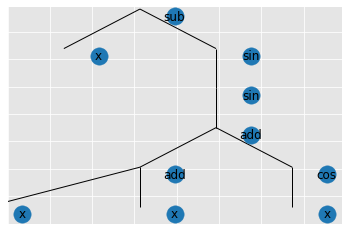

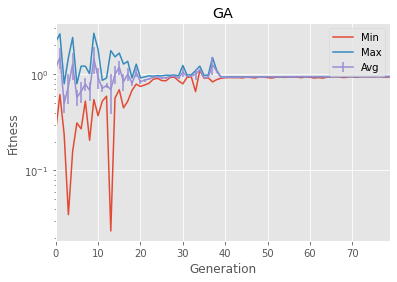

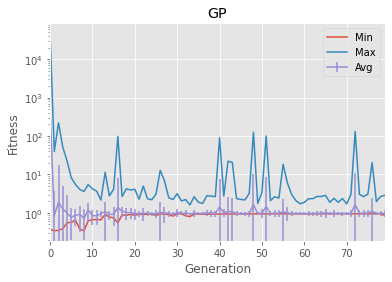

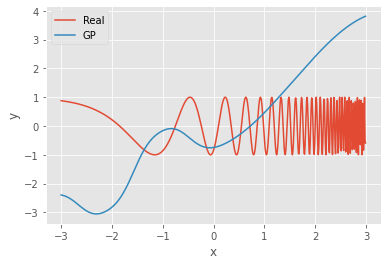

Best individual GA is [-0.9925457642283119, -0.058035039675548704, -0.4720242142367065, -0.05678581986289254, 0.6325635278935391, -0.05678201216058369, 0.7898003610787616, 0.6339952768861878, -0.4719081977244599, -0.06016126648250414], (0.9467842220363369,)
Best individual GP is sub(x, sin(sin(add(add(x, x), cos(x))))), (0.8525755353208428,)


In [20]:
import os

import sys
import time
import random
import operator
import math

import numpy

from deap import base
from deap import creator
from deap import tools
from deap import gp

import utils.utils_11.plot_utils as plot_utils
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

GA_POP_SIZE = 200               # population size for GA
NGEN = 80                       # number of generations (for both GA and GP)
GA_TRNMT_SIZE = 3               # tournament size for GA
GA_REP_IND = 10                 # number of arrays for each GA individual
GA_CXPB, GA_MUTPB = 0.8, 0.1    # crossover and mutation probability for GA


GP_POP_SIZE = 200               # population size for GP
GP_NGEN = 90                    # number of generations for GP
GP_CXPB, GP_MUTPB = 0.9, 0.05    # crossover and mutation probability for GP
GP_TRNMT_SIZE = 3               # tournament size for GP
GP_HOF_SIZE = 1                 # size of the Hall-of-Fame for GP

seed = 0
"""
-------------------------------------------------------------------------
"""

try:
    del creator.FitnessMaxGA
    del creator.IndividualGA
except:
    pass
creator.create("FitnessMaxGA", base.Fitness, weights=(1.0,))
creator.create("IndividualGA", list, fitness=creator.FitnessMaxGA)
    
toolbox_ga = base.Toolbox()

toolbox_ga.register("float", random.uniform, -1, 1)
toolbox_ga.register("individual", tools.initRepeat, creator.IndividualGA, toolbox_ga.float, GA_REP_IND)
toolbox_ga.register("population", tools.initRepeat, list, toolbox_ga.individual)

toolbox_ga.register("select", tools.selTournament, tournsize=GA_TRNMT_SIZE)
toolbox_ga.register("mate", tools.cxTwoPoint)
# we leave the internal parameters of mutation (mu, sigma and indpb) as they are
toolbox_ga.register("mutate", tools.mutGaussian, mu=0, sigma=0.01, indpb=0.05)

def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addPrimitive(math.exp, 1)

try:
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
except:
    print("EphemeralConstant is already defined, if you changed it restart the kernel")
pset.renameArguments(ARG0='x')

try:
    del creator.FitnessMinGP
    del creator.IndividualGP
except:
    pass
creator.create("FitnessMinGP", base.Fitness, weights=(-1.0,))
creator.create("IndividualGP", gp.PrimitiveTree, fitness=creator.FitnessMinGP)

toolbox_gp = base.Toolbox()
toolbox_gp.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox_gp.register("individual", tools.initIterate, creator.IndividualGP, toolbox_gp.expr)
toolbox_gp.register("population", tools.initRepeat, list, toolbox_gp.individual)
toolbox_gp.register("compile", gp.compile, pset=pset)

# TODO: try to change the expression e.g. to include trigonometric functions
def generatorFunction(x):
    return math.cos(math.exp(x)*10)

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    gpFunction = toolbox_gp.compile(expr=individual)
    # Evaluate the mean squared error between the expression and the real function
    sqerrors = ((gpFunction(x) - generatorFunction(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox_gp.register("evaluate", evalSymbReg, points=[x/10. for x in range(-30,30)])
toolbox_gp.register("select", tools.selTournament, tournsize=GP_TRNMT_SIZE)
toolbox_gp.register("mate", gp.cxOnePoint)
toolbox_gp.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox_gp.register("mutate", gp.mutUniform, expr=toolbox_gp.expr_mut, pset=pset)

toolbox_gp.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox_gp.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#--------------------------------------------------------------------
seed = 238842
random.seed(seed)

pop_ga = toolbox_ga.population(n=GA_POP_SIZE)
pop_gp = toolbox_gp.population(n=GP_POP_SIZE)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

logbook = tools.Logbook()
logbook.header = "gen", "type", "evals", "std", "min", "avg", "max"

best_ga = tools.selRandom(pop_ga, 1)[0]
best_gp = tools.selRandom(pop_gp, 1)[0]

for ind in pop_gp:
    ind.fitness.values = toolbox_gp.evaluate(ind, points=best_ga)  

for ind in pop_ga:
    ind.fitness.values = toolbox_gp.evaluate(best_gp, points=ind)

record = stats.compile(pop_ga)
logbook.record(gen=0, type='ga', evals=len(pop_ga), **record)

record = stats.compile(pop_gp)
logbook.record(gen=0, type='gp', evals=len(pop_gp), **record)

print(logbook.stream)

# Begin the evolution
for g in range(1, NGEN):
    # Select and clone the offspring
    off_ga = toolbox_ga.select(pop_ga, len(pop_ga))
    off_gp = toolbox_gp.select(pop_gp, len(pop_gp))
    off_ga = [toolbox_ga.clone(ind) for ind in off_ga]        
    off_gp = [toolbox_gp.clone(ind) for ind in off_gp]

    # Apply crossover and mutation
    for ind1, ind2 in zip(off_ga[::2], off_ga[1::2]):
        if random.random() < GA_CXPB:
            toolbox_ga.mate(ind1, ind2)
            del ind1.fitness.values
            del ind2.fitness.values

    for ind1, ind2 in zip(off_gp[::2], off_gp[1::2]):
        if random.random() < GP_CXPB:
            toolbox_gp.mate(ind1, ind2)
            del ind1.fitness.values
            del ind2.fitness.values

    for ind in off_ga:
        if random.random() < GA_MUTPB:
            toolbox_ga.mutate(ind)
            del ind.fitness.values

    for ind in off_gp:
        if random.random() < GP_MUTPB:
            toolbox_gp.mutate(ind)
            del ind.fitness.values

    # Evaluate the individuals with an invalid fitness
    for ind in off_ga:
        ind.fitness.values = toolbox_gp.evaluate(best_gp, points=ind)

    for ind in off_gp:
        ind.fitness.values = toolbox_gp.evaluate(ind, points=best_ga)

    # Replace the old population by the offspring
    pop_ga = off_ga
    pop_gp = off_gp

    record = stats.compile(pop_ga)
    logbook.record(gen=g, type='ga', evals=len(pop_ga), **record)

    record = stats.compile(pop_gp)
    logbook.record(gen=g, type='gp', evals=len(pop_gp), **record)
    print(logbook.stream)

    best_ga = tools.selBest(pop_ga, 1)[0]
    best_gp = tools.selBest(pop_gp, 1)[0]

#--------------------------------------------------------------------

# plot GP tree

nodes, edges, labels = gp.graph(best_gp)

plot_utils.plotTree(nodes,edges,labels,'coev_'+str(seed),'results')

#--------------------------------------------------------------------

# plot fitness trends
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import os
folder = 'results'
if folder is not None and not os.path.exists(folder):
    os.makedirs(folder)
name = 'coev_'+str(seed)

gen = numpy.array(logbook.select("gen"))
fit_type = numpy.array(logbook.select("type"))
fit_min = numpy.array(logbook.select("min"))
fit_max = numpy.array(logbook.select("max"))
fit_avg = numpy.array(logbook.select("avg"))
fit_std = numpy.array(logbook.select("std"))

ga_entries = numpy.array([i for i,val in enumerate(fit_type) if val=='ga'])
gp_entries = numpy.array([i for i,val in enumerate(fit_type) if val=='gp'])

fig = plt.figure("GA (fitness trend)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen[ga_entries], fit_min[ga_entries], label="Min")
line2 = ax1.plot(gen[ga_entries], fit_max[ga_entries], label="Max")
line3 = ax1.errorbar(gen[ga_entries], fit_avg[ga_entries], yerr=fit_std[ga_entries], label="Avg")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")
ax1.set_yscale("log")
ax1.set_xlim(0,len(gen[ga_entries])-1)
ax1.set_title('GA')
ax1.legend()
plt.savefig(folder+'/'+'trends_'+name+'_ga.png')

fig = plt.figure("GP (fitness trend)")
ax2 = fig.add_subplot(111)
line1 = ax2.plot(gen[gp_entries], fit_min[gp_entries], label="Min")
line2 = ax2.plot(gen[gp_entries], fit_max[gp_entries], label="Max")
line3 = ax2.errorbar(gen[gp_entries], fit_avg[gp_entries], yerr=fit_std[gp_entries], label="Avg")
ax2.set_xlabel("Generation")
ax2.set_ylabel("Fitness")
ax2.set_yscale("log")
ax2.set_xlim(0,len(gen[gp_entries])-1)
ax2.set_title('GP')
ax2.legend()
plt.savefig(folder+'/'+'trends_'+name+'_gp.png')

plt.show()

# plot real vs. GP-approximated values
x_ = points=[x/100. for x in range(-300,300)]
y_real = [generatorFunction(x) for x in x_]
gpFunction = toolbox_gp.compile(expr=best_gp)
y_gp = [gpFunction(x) for x in x_]
fig = plt.figure("GP (real vs approximated values)")
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x_, y_real, label="Real")
line2 = ax1.plot(x_, y_gp, label="GP")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
plt.show()

#--------------------------------------------------------------------

print("Best individual GA is %s, %s" % (best_ga, best_ga.fitness.values))
print("Best individual GP is %s, %s" % (best_gp, best_gp.fitness.values))